In [ ]:
!pip install --upgrade ta
import ta
from ta.volatility import AverageTrueRange as ATR
from ta.trend import EMAIndicator as EMA
from ta.momentum import RSIIndicator as RSI
from ta.trend import MACD
from ta.trend import ADXIndicator as ADX
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=e4cd944099f8f83ff6702d30fc305d865e5149e2a41e349ace5fcc83a9ad6ea1
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [ ]:
read = pd.read_csv('/content/Stock Data.csv',sep=',')
read.head()
read.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Unnamed: 5    float64
Volume        float64
dtype: object

In [ ]:
read.shape
read = read.drop(columns=['Unnamed: 5'])

In [ ]:
read = read.dropna()

In [ ]:
atr = ATR(high = read['High'],low=read['Low'],close=read['Close'],window = 3)
read['ATR'] = atr.average_true_range()
read

Date          Open          High  ...         Close    Volume         ATR
0    2020-09-11  11447.799805  11493.500000  ...  11464.450195  554800.0    0.000000
1    2020-09-14  11540.150391  11568.900391  ...  11440.049805  642300.0    0.000000
2    2020-09-15  11487.200195  11535.950195  ...  11521.799805  506700.0  118.283528
3    2020-09-16  11538.450195  11618.099609  ...  11604.549805  527800.0  112.638889
4    2020-09-17  11539.400391  11587.200195  ...  11516.099609       0.0  110.442527
..          ...           ...           ...  ...           ...       ...         ...
120  2021-03-04  15026.750000  15202.349609  ...  15080.750000  534900.0  302.614879
121  2021-03-05  14977.950195  15092.349609  ...  14938.099609  640700.0  278.493253
122  2021-03-08  15002.450195  15111.150391  ...  14956.200195       0.0  249.412169
123  2021-03-09  15049.900391  15126.849609  ...  15098.400391  675300.0  233.407917
124  2021-03-10  15202.150391  15218.450195  ...  15174.799805  404600.0  195.621879

[123 rows x 7 columns]

In [ ]:
rsi = RSI(close = read['Close'],window = 3)
read['RSI'] = rsi.rsi()
read

Date          Open          High  ...    Volume         ATR        RSI
0    2020-09-11  11447.799805  11493.500000  ...  554800.0    0.000000        NaN
1    2020-09-14  11540.150391  11568.900391  ...  642300.0    0.000000        NaN
2    2020-09-15  11487.200195  11535.950195  ...  506700.0  118.283528  83.403962
3    2020-09-16  11538.450195  11618.099609  ...  527800.0  112.638889  92.677237
4    2020-09-17  11539.400391  11587.200195  ...       0.0  110.442527  48.883443
..          ...           ...           ...  ...       ...         ...        ...
120  2021-03-04  15026.750000  15202.349609  ...  534900.0  302.614879  57.451274
121  2021-03-05  14977.950195  15092.349609  ...  640700.0  278.493253  43.917853
122  2021-03-08  15002.450195  15111.150391  ...       0.0  249.412169  46.324408
123  2021-03-09  15049.900391  15126.849609  ...  675300.0  233.407917  64.351099
124  2021-03-10  15202.150391  15218.450195  ...  404600.0  195.621879  71.944527

[123 rows x 8 columns]

In [ ]:
macd = MACD(close=read['Close'],window_sign=3,window_slow=7,window_fast=5)
read['MACD'] = macd.macd()
read

Date          Open          High  ...         ATR        RSI       MACD
0    2020-09-11  11447.799805  11493.500000  ...    0.000000        NaN        NaN
1    2020-09-14  11540.150391  11568.900391  ...    0.000000        NaN        NaN
2    2020-09-15  11487.200195  11535.950195  ...  118.283528  83.403962        NaN
3    2020-09-16  11538.450195  11618.099609  ...  112.638889  92.677237        NaN
4    2020-09-17  11539.400391  11587.200195  ...  110.442527  48.883443        NaN
..          ...           ...           ...  ...         ...        ...        ...
120  2021-03-04  15026.750000  15202.349609  ...  302.614879  57.451274  24.002079
121  2021-03-05  14977.950195  15092.349609  ...  278.493253  43.917853  11.862940
122  2021-03-08  15002.450195  15111.150391  ...  249.412169  46.324408   6.313175
123  2021-03-09  15049.900391  15126.849609  ...  233.407917  64.351099  14.862210
124  2021-03-10  15202.150391  15218.450195  ...  195.621879  71.944527  24.264829

[123 rows x 9 columns]

In [ ]:
ema = EMA(close = read['Close'],window=3)
read['EMA'] = ema.ema_indicator()
read

Date          Open          High  ...        RSI       MACD           EMA
0    2020-09-11  11447.799805  11493.500000  ...        NaN        NaN           NaN
1    2020-09-14  11540.150391  11568.900391  ...        NaN        NaN           NaN
2    2020-09-15  11487.200195  11535.950195  ...  83.403962        NaN  11487.024903
3    2020-09-16  11538.450195  11618.099609  ...  92.677237        NaN  11545.787354
4    2020-09-17  11539.400391  11587.200195  ...  48.883443        NaN  11530.943481
..          ...           ...           ...  ...        ...        ...           ...
120  2021-03-04  15026.750000  15202.349609  ...  57.451274  24.002079  15061.808305
121  2021-03-05  14977.950195  15092.349609  ...  43.917853  11.862940  14999.953957
122  2021-03-08  15002.450195  15111.150391  ...  46.324408   6.313175  14978.077076
123  2021-03-09  15049.900391  15126.849609  ...  64.351099  14.862210  15038.238733
124  2021-03-10  15202.150391  15218.450195  ...  71.944527  24.264829  15106.519269

[123 rows x 10 columns]

In [ ]:
adx = ADX(high = read['High'],low=read['Low'],close=read['Close'],window=3)
read['ADX'] = adx.adx()
read

/usr/local/lib/python3.7/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.7/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


Date          Open          High  ...       MACD           EMA        ADX
0    2020-09-11  11447.799805  11493.500000  ...        NaN           NaN   0.000000
1    2020-09-14  11540.150391  11568.900391  ...        NaN           NaN   0.000000
2    2020-09-15  11487.200195  11535.950195  ...        NaN  11487.024903   0.000000
3    2020-09-16  11538.450195  11618.099609  ...        NaN  11545.787354   0.000000
4    2020-09-17  11539.400391  11587.200195  ...        NaN  11530.943481   0.000000
..          ...           ...           ...  ...        ...           ...        ...
120  2021-03-04  15026.750000  15202.349609  ...  24.002079  15061.808305  37.438979
121  2021-03-05  14977.950195  15092.349609  ...  11.862940  14999.953957  25.677010
122  2021-03-08  15002.450195  15111.150391  ...   6.313175  14978.077076  18.502714
123  2021-03-09  15049.900391  15126.849609  ...  14.862210  15038.238733  16.013247
124  2021-03-10  15202.150391  15218.450195  ...  24.264829  15106.519269  25.795985

[123 rows x 11 columns]

In [ ]:
read["close_shift"] = read["Close"].shift(1)
read["up_down"] = read["Open"] - read["close_shift"]
read.loc[read["up_down"] < 0,"up_down_encode"] = 0
read.loc[read["up_down"] >= 0,"up_down_encode"] = 1
read = read.fillna(0)
read['up_down_encode'] = read['up_down_encode'].astype('int')
read

Date          Open  ...     up_down  up_down_encode
0    2020-09-11  11447.799805  ...    0.000000               0
1    2020-09-14  11540.150391  ...   75.700196               1
2    2020-09-15  11487.200195  ...   47.150390               1
3    2020-09-16  11538.450195  ...   16.650390               1
4    2020-09-17  11539.400391  ...  -65.149414               0
..          ...           ...  ...         ...             ...
120  2021-03-04  15026.750000  ... -218.849609               0
121  2021-03-05  14977.950195  ... -102.799805               0
122  2021-03-08  15002.450195  ...   64.350586               1
123  2021-03-09  15049.900391  ...   93.700196               1
124  2021-03-10  15202.150391  ...  103.750000               1

[123 rows x 14 columns]

In [ ]:
read.tail(30)

Date          Open  ...     up_down  up_down_encode
95   2021-01-28  13810.400391  ... -157.099609               0
96   2021-01-29  13946.599609  ...  129.049804               1
97   2021-02-01  13758.599609  ...  124.000000               1
98   2021-02-02  14481.099609  ...  199.899414               1
99   2021-02-03  14754.900391  ...  107.050782               1
100  2021-02-04  14789.049805  ...   -0.900390               0
101  2021-02-05  14952.599609  ...   56.949218               1
102  2021-02-08  15064.299805  ...  140.049805               1
103  2021-02-09  15164.150391  ...   48.350586               1
104  2021-02-10  15119.049805  ...    9.750000               1
105  2021-02-11  15073.250000  ...  -33.250000               0
106  2021-02-12  15186.200195  ...   12.900390               1
107  2021-02-15  15270.299805  ...  107.000000               1
108  2021-02-16  15371.450195  ...   56.750000               1
109  2021-02-17  15279.900391  ...  -33.549804               0
110  2021-02-18  15238.700195  ...   29.799804               1
111  2021-02-19  15074.799805  ...  -44.150390               0
112  2021-02-22  14999.049805  ...   17.299805               1
113  2021-02-23  14782.250000  ...  106.549805               1
114  2021-02-24  14729.150391  ...   21.350586               1
115  2021-02-25  15079.849609  ...   97.849609               1
116  2021-02-26  14888.599609  ... -208.750000               0
117  2021-03-01  14702.500000  ...  173.349609               1
118  2021-03-02  14865.299805  ...  103.750000               1
119  2021-03-03  15064.400391  ...  145.300782               1
120  2021-03-04  15026.750000  ... -218.849609               0
121  2021-03-05  14977.950195  ... -102.799805               0
122  2021-03-08  15002.450195  ...   64.350586               1
123  2021-03-09  15049.900391  ...   93.700196               1
124  2021-03-10  15202.150391  ...  103.750000               1

[30 rows x 14 columns]

# New Section

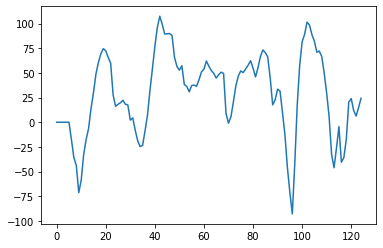

In [ ]:
plt.plot(read.index,read['MACD'])
plt.show()

In [ ]:
read.shape
print(read.loc[0:3,'Open'])

0    11447.799805
1    11540.150391
2    11487.200195
3    11538.450195
Name: Open, dtype: float64


In [ ]:
X=['Open','Close','High','Low','Volume','EMA','RSI','MACD','ADX','ATR']
Y=['up_down']
Y_class = ['up_down_encode']

In [ ]:
read.shape
#read = read.reset_index(inplace=False)
print(read)

     index        Date          Open  ...   close_shift     up_down  up_down_encode
0        0  2020-09-11  11447.799805  ...      0.000000    0.000000               0
1        1  2020-09-14  11540.150391  ...  11464.450195   75.700196               1
2        2  2020-09-15  11487.200195  ...  11440.049805   47.150390               1
3        3  2020-09-16  11538.450195  ...  11521.799805   16.650390               1
4        4  2020-09-17  11539.400391  ...  11604.549805  -65.149414               0
..     ...         ...           ...  ...           ...         ...             ...
118    120  2021-03-04  15026.750000  ...  15245.599609 -218.849609               0
119    121  2021-03-05  14977.950195  ...  15080.750000 -102.799805               0
120    122  2021-03-08  15002.450195  ...  14938.099609   64.350586               1
121    123  2021-03-09  15049.900391  ...  14956.200195   93.700196               1
122    124  2021-03-10  15202.150391  ...  15098.400391  103.750000         

Decision Tree Regressor

For 3 days timeframe 

119
up_down    12314.7
dtype: object value of i is 119 and j is 121



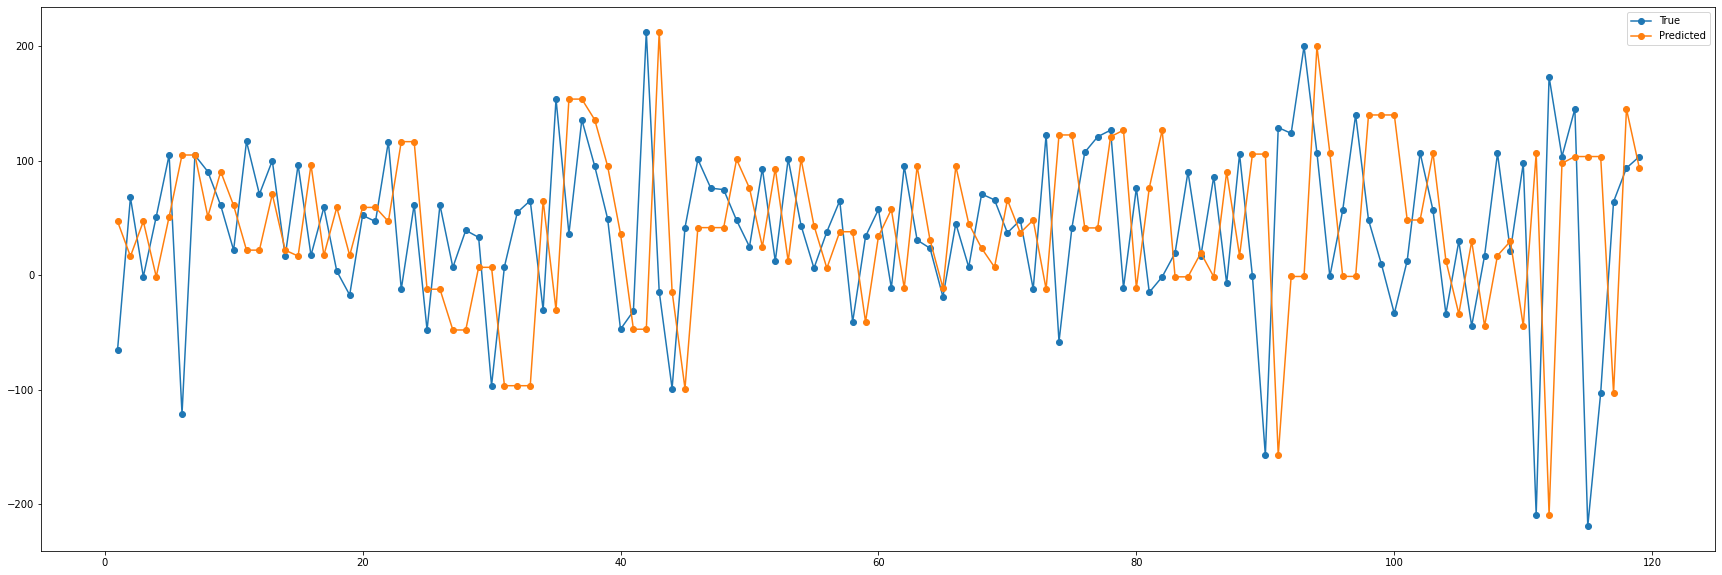

For 5 days timeframe 

117
up_down    11816.7
dtype: object value of i is 117 and j is 121



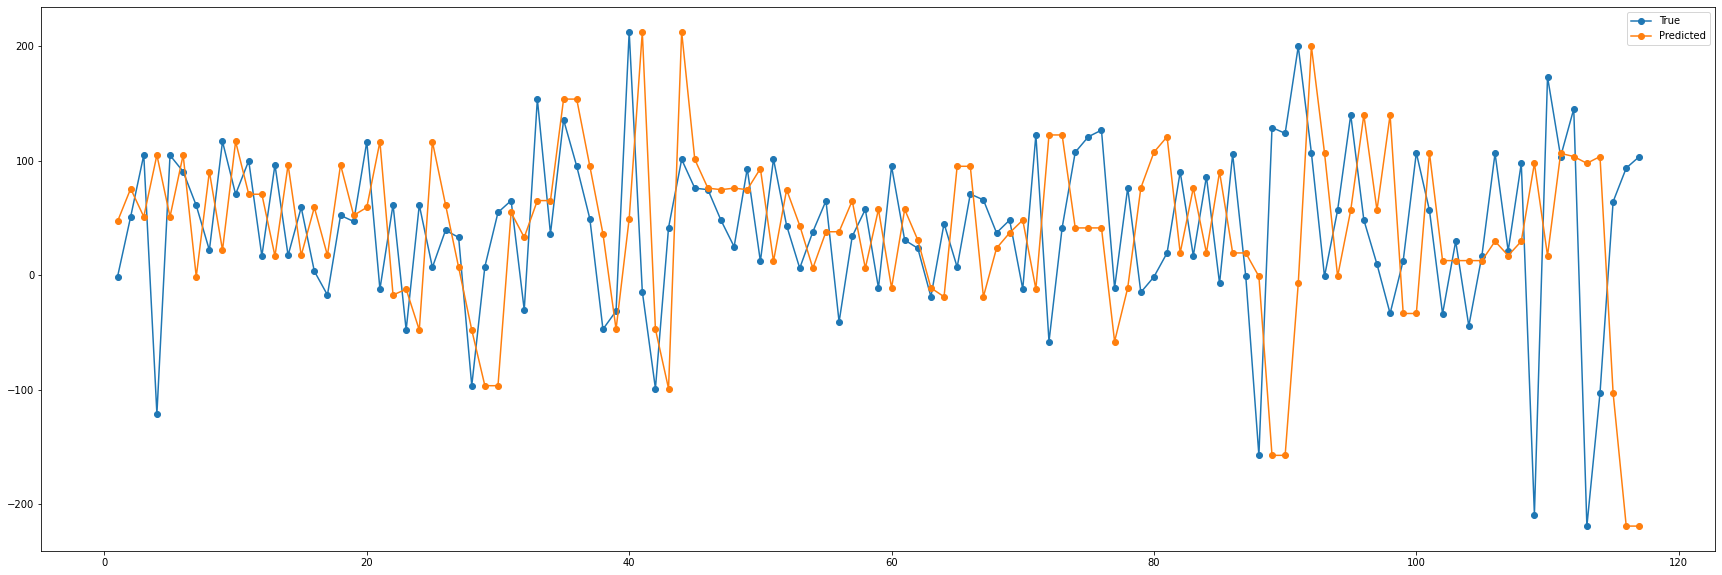

For 7 days timeframe 

115
up_down    12998.7
dtype: object value of i is 115 and j is 121



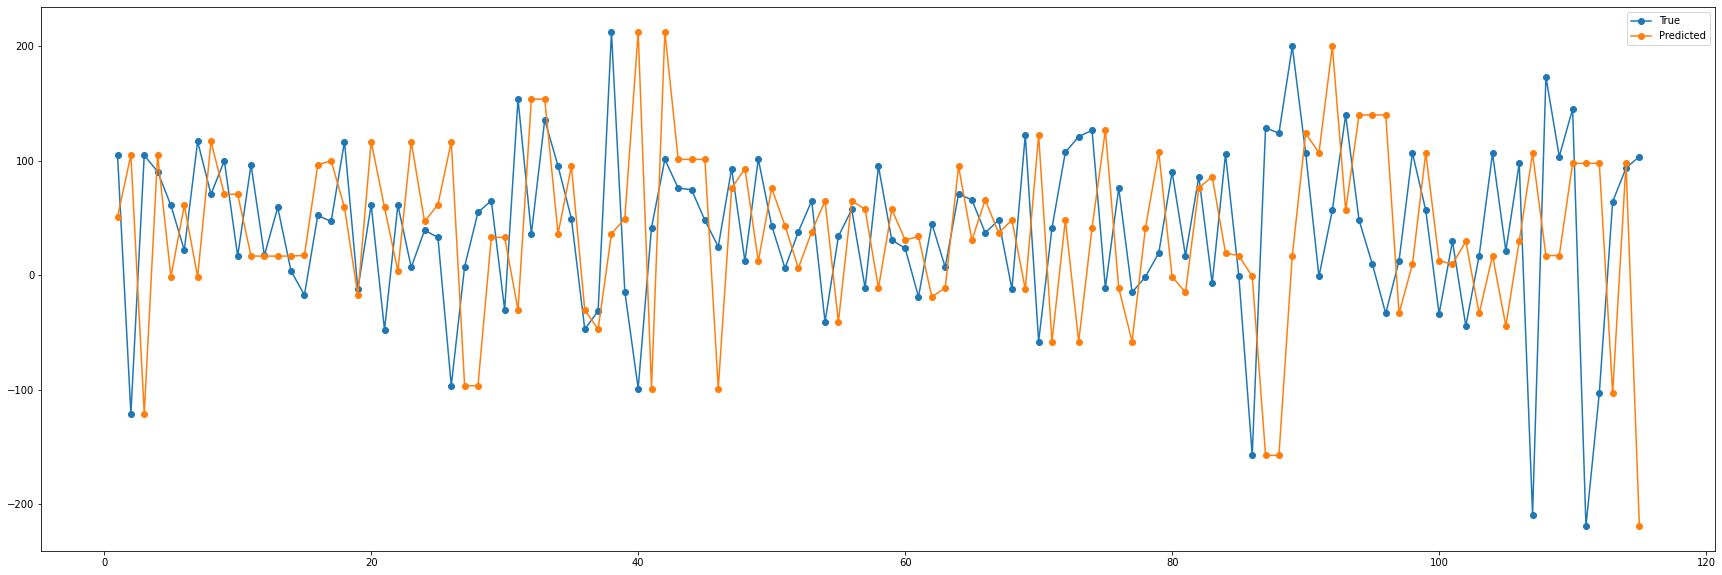

For 9 days timeframe 

113
up_down    11407.9
dtype: object value of i is 113 and j is 121



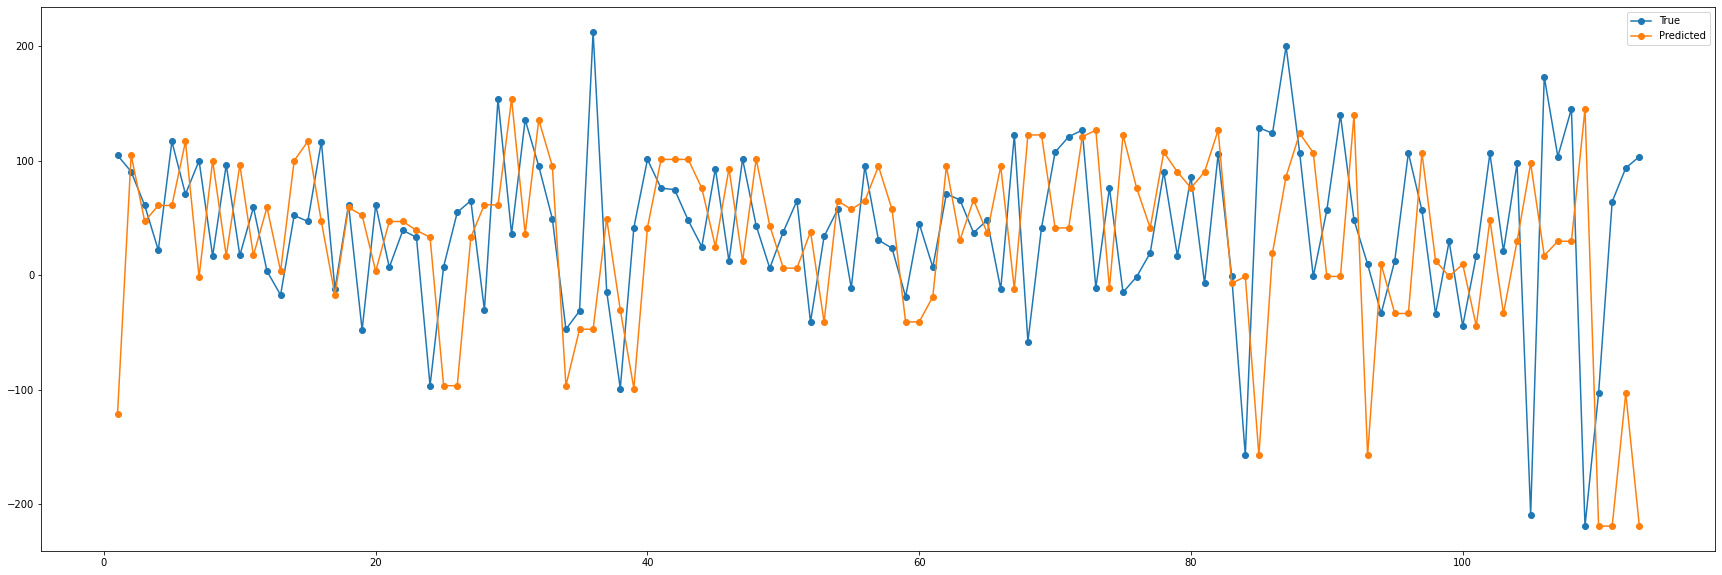

In [ ]:
for k in [3,5,7,9]:
  error_dtr=[]
  y_p = []
  y_t = []
  j=0
  i=0
  model = DecisionTreeRegressor()
  while(j<121):
    model.fit(read.loc[i:i+k,X],read.loc[i:i+k,'up_down'])
    y_pred = model.predict([read.loc[i+k+1,X]])
    y_true = read.loc[i+k+1,Y]
    error_dtr.append((y_true-y_pred)**2)
    j=i+k
    i+=1
    y_p.append(y_pred)
    y_t.append(y_true)
  print("For "+str(k)+" days timeframe \n")
  print(len(error_dtr))
  print(str(sum(error_dtr)/i)+" value of i is "+str(i)+" and j is "+str(j)+"\n")
  plt.figure(figsize=(30,10))
  plt.plot([i for i in range(1,i+1)],y_t,marker='o')
  plt.plot([i for i in range(1,i+1)],y_p,marker='o')
  plt.legend(['True','Predicted'])
  plt.show()

Random Forest Regressor

For 3 days timeframe 

119
up_down    8350.19
dtype: object


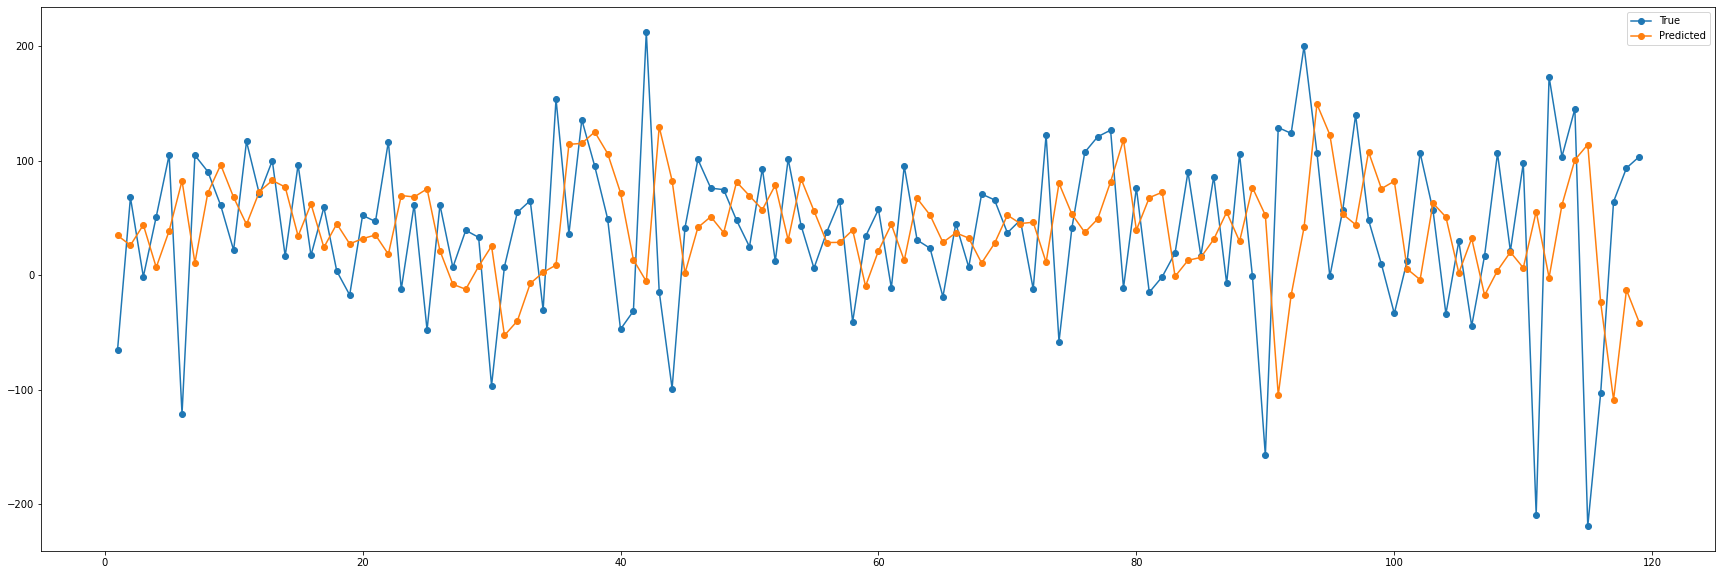

For 5 days timeframe 

117
up_down    7865.87
dtype: object


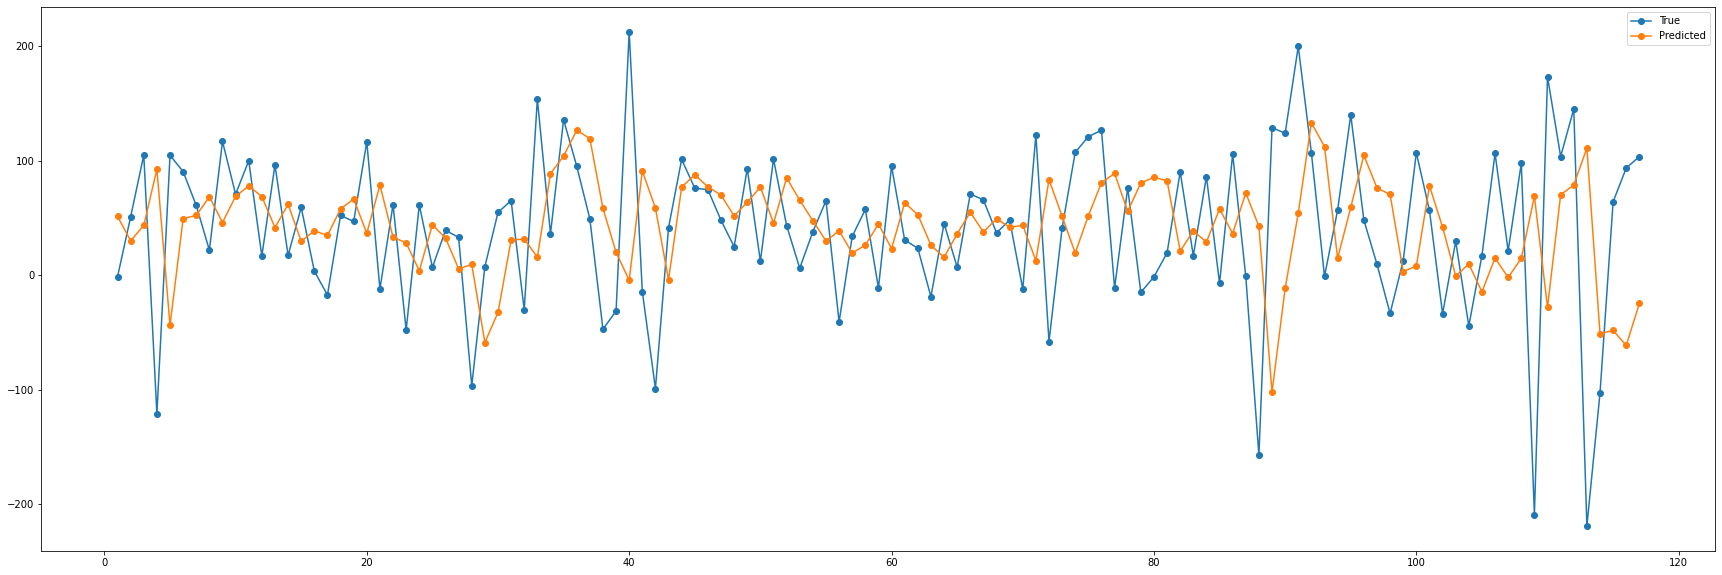

For 7 days timeframe 

115
up_down    7798.41
dtype: object


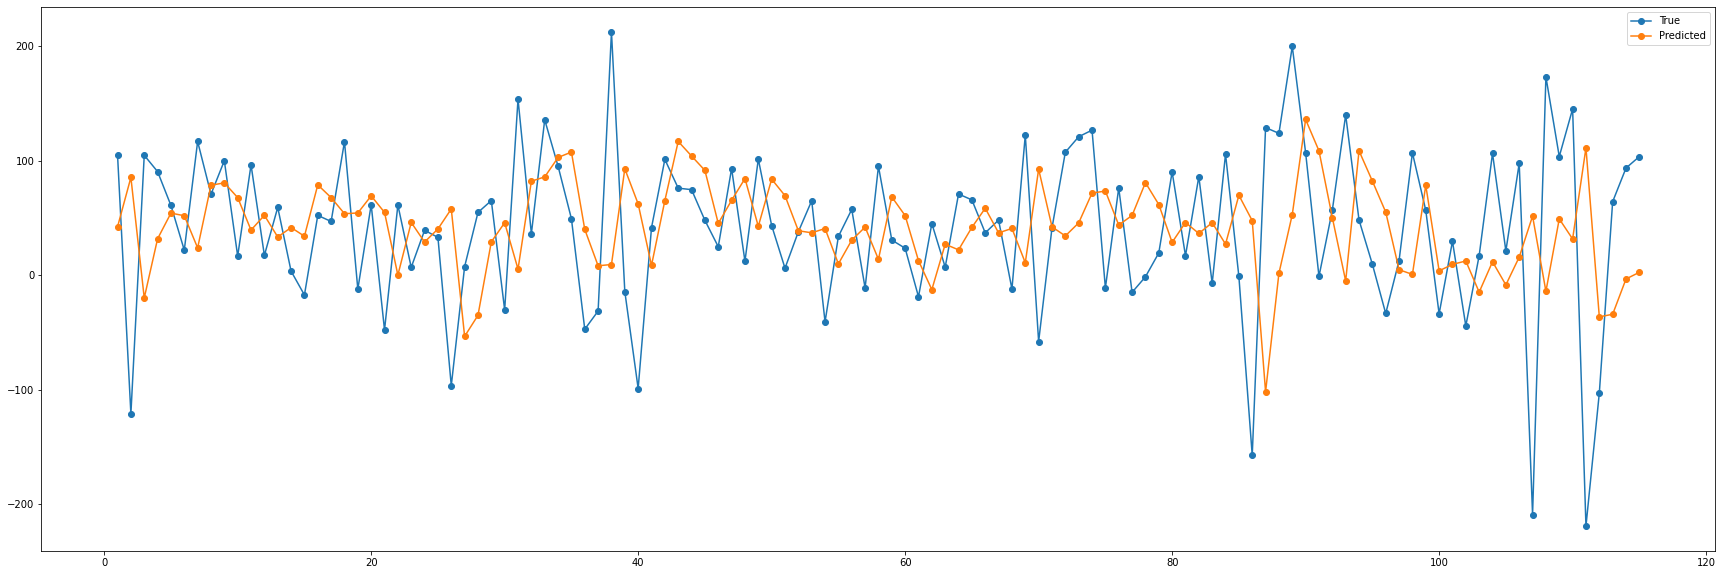

For 9 days timeframe 

113
up_down    7466.28
dtype: object


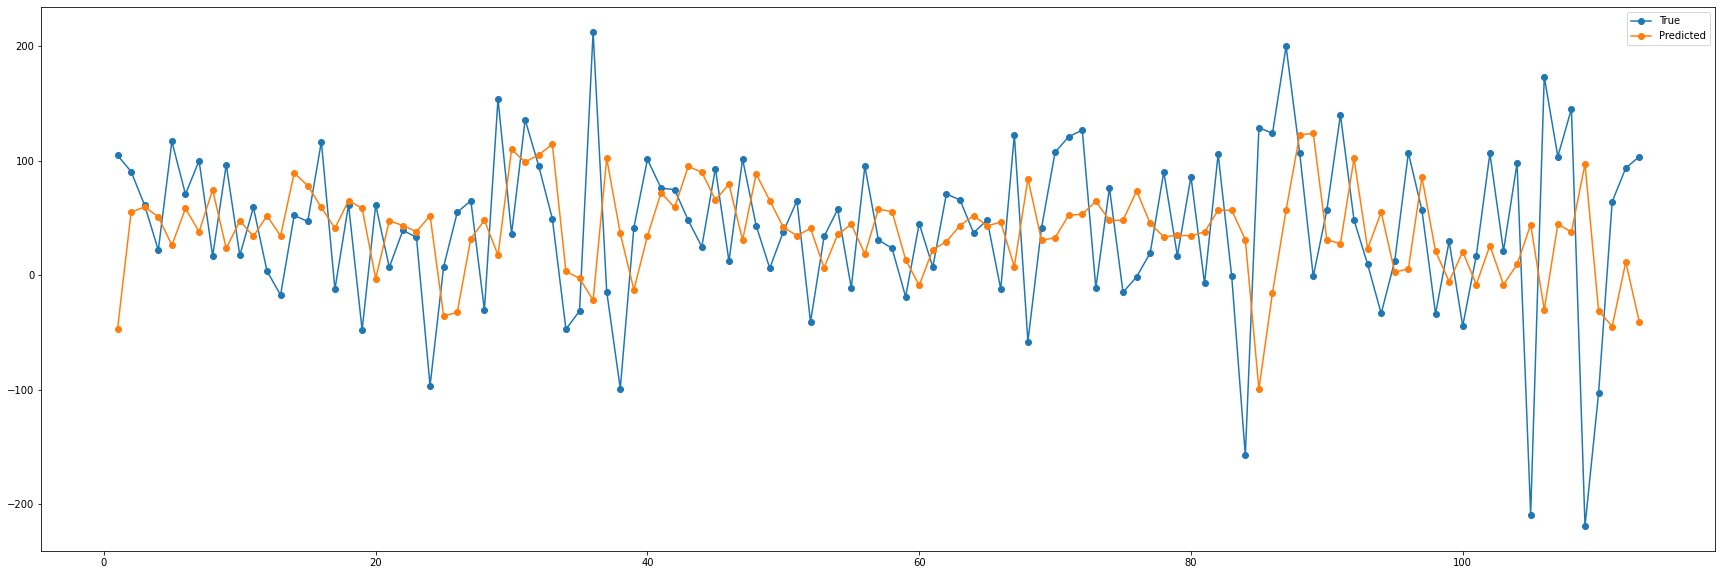

In [ ]:
for k in [3,5,7,9]:
  error_rfr=[]
  j=0
  i=0
  y_p = []
  y_t = []
  model = RandomForestRegressor(n_estimators=100,n_jobs=-1)
  while(j<121):
    model.fit(read.loc[i:i+k,X],read.loc[i:i+k,'up_down'])
    y_pred = model.predict([read.loc[i+k+1,X]])
    y_true = read.loc[i+k+1,Y]
    error_rfr.append((y_true-y_pred)**2)
    j=i+k
    i+=1
    y_p.append(y_pred)
    y_t.append(y_true)
  print("For "+str(k)+" days timeframe \n")
  print(len(error_rfr))
  print(str(sum(error_rfr)/i))
  plt.figure(figsize=(30,10))
  plt.plot([i for i in range(1,i+1)],y_t,marker='o')
  plt.plot([i for i in range(1,i+1)],y_p,marker='o')
  plt.legend(['True','Predicted'])
  plt.show()

Bagging Regressor

For 3 days timeframe 

119
up_down    9583.23
dtype: object


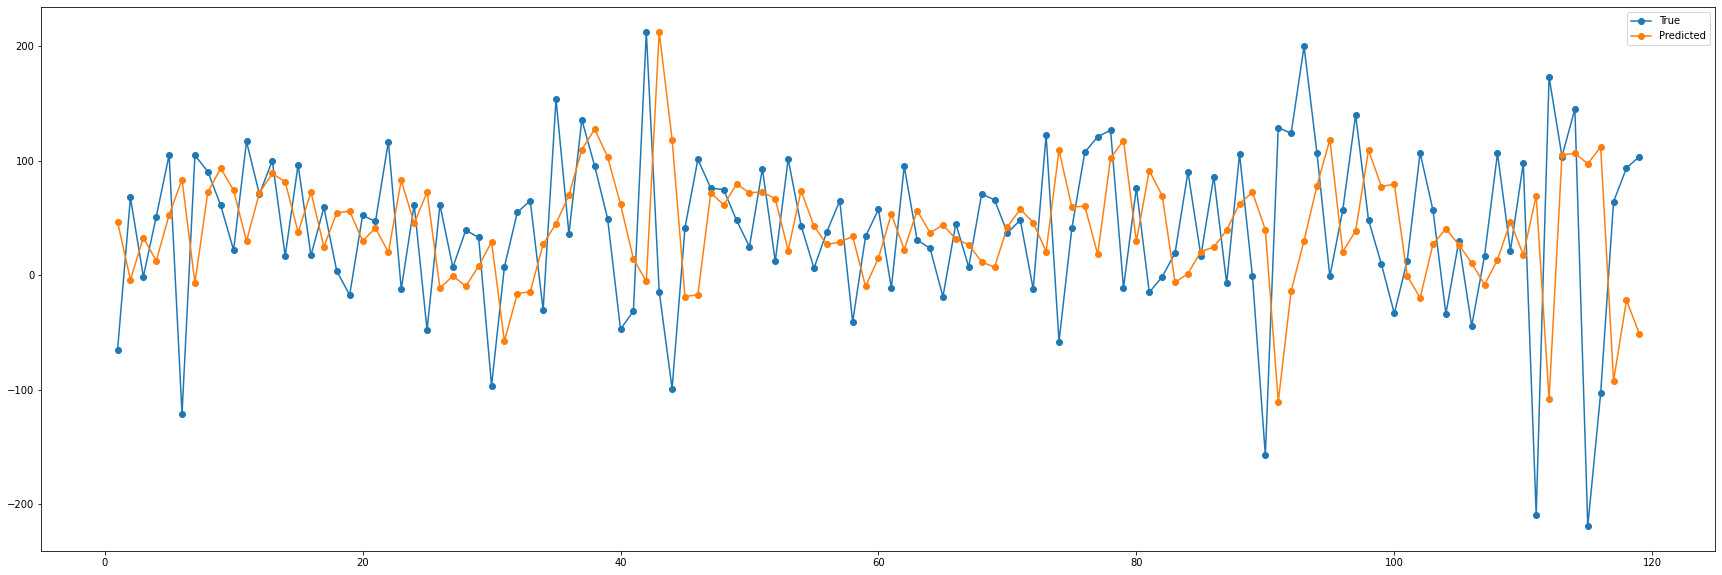

For 5 days timeframe 

117
up_down    7611.61
dtype: object


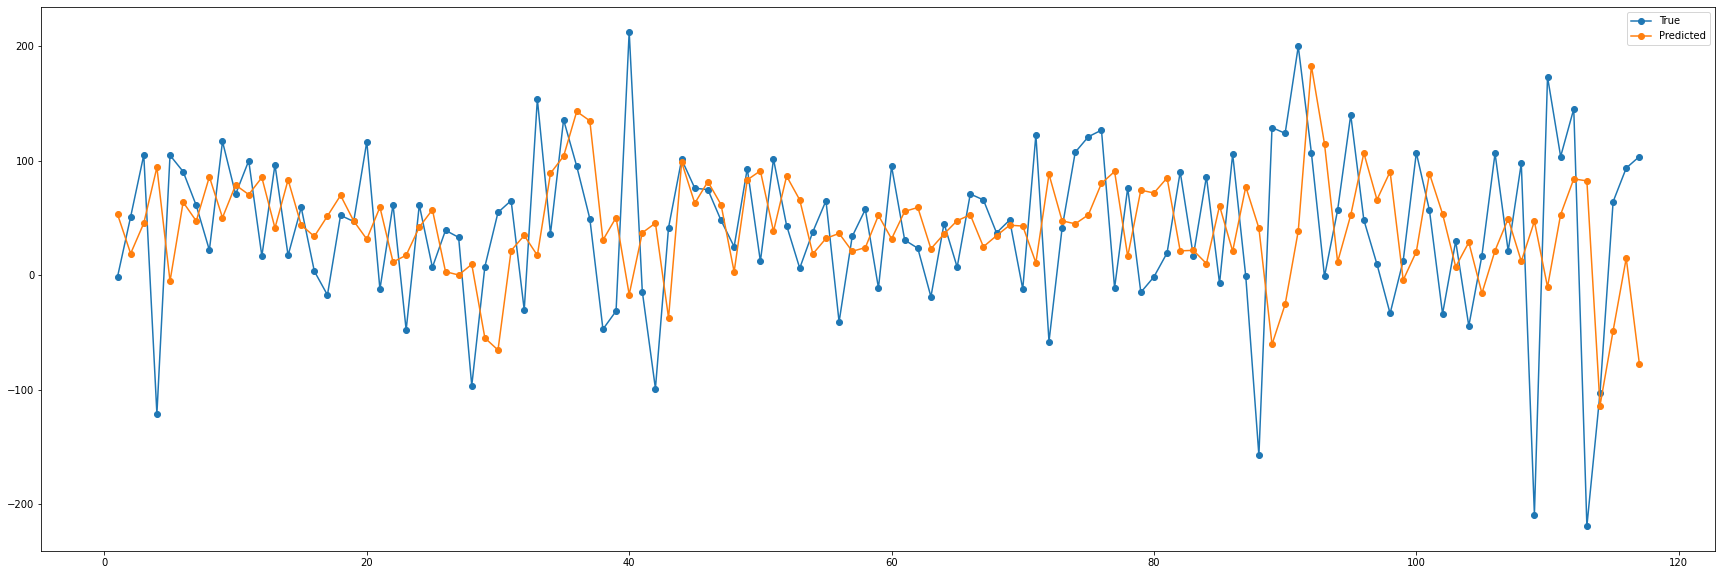

For 7 days timeframe 

115
up_down    8707.36
dtype: object


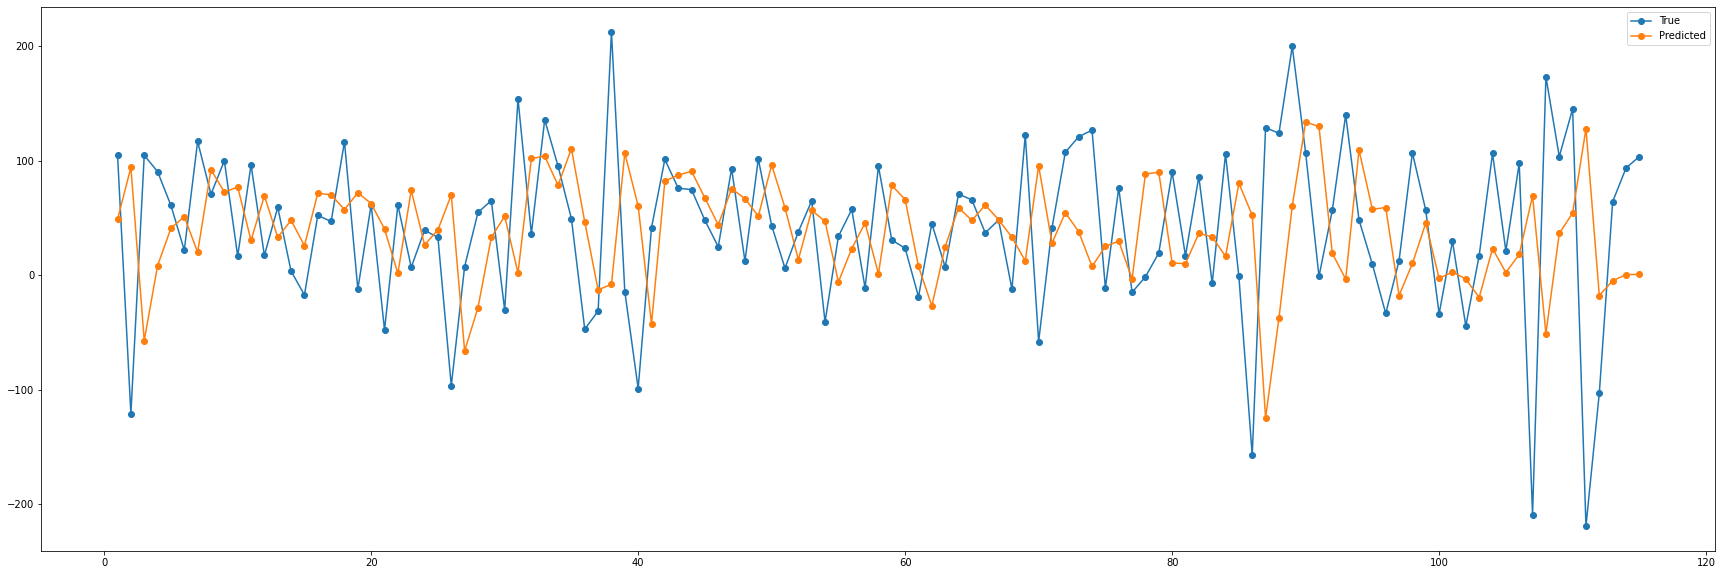

For 9 days timeframe 

113
up_down    7931.45
dtype: object


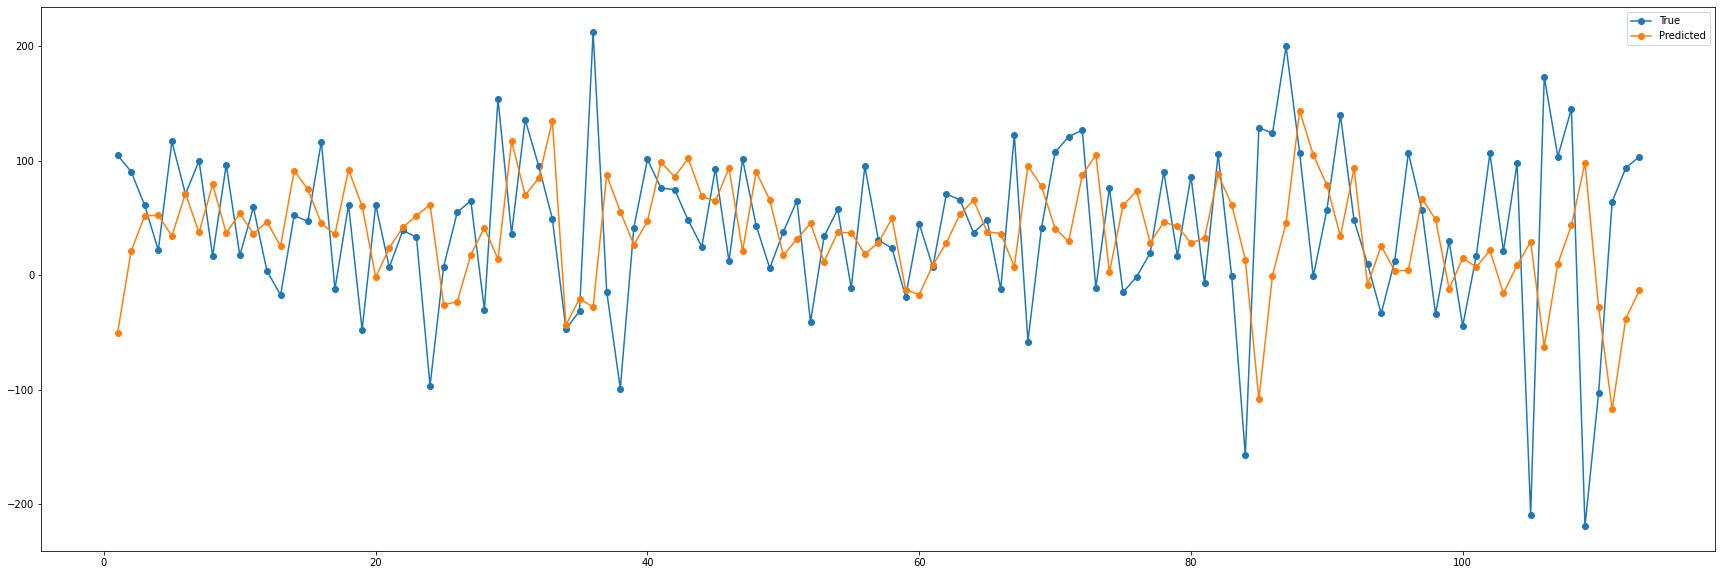

In [ ]:
for k in [3,5,7,9]:
  error_br=[]
  j=0
  i=0
  y_p = []
  y_t = []
  model = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_jobs=-1)
  while(j<121):
    model.fit(read.loc[i:i+k,X],read.loc[i:i+k,'up_down'])
    y_pred = model.predict([read.loc[i+k+1,X]])
    y_true = read.loc[i+k+1,Y]
    error_br.append((y_true-y_pred)**2)
    j=i+k
    i+=1
    y_p.append(y_pred)
    y_t.append(y_true)
  print("For "+str(k)+" days timeframe \n")
  print(len(error_br))
  print(str(sum(error_br)/i))
  plt.figure(figsize=(30,10))
  plt.plot([i for i in range(1,i+1)],y_t,marker='o')
  plt.plot([i for i in range(1,i+1)],y_p,marker='o')
  plt.legend(['True','Predicted'])
  plt.show()

Adaboost Regressor

For 3 days timeframe 

119
up_down    11232.9
dtype: object


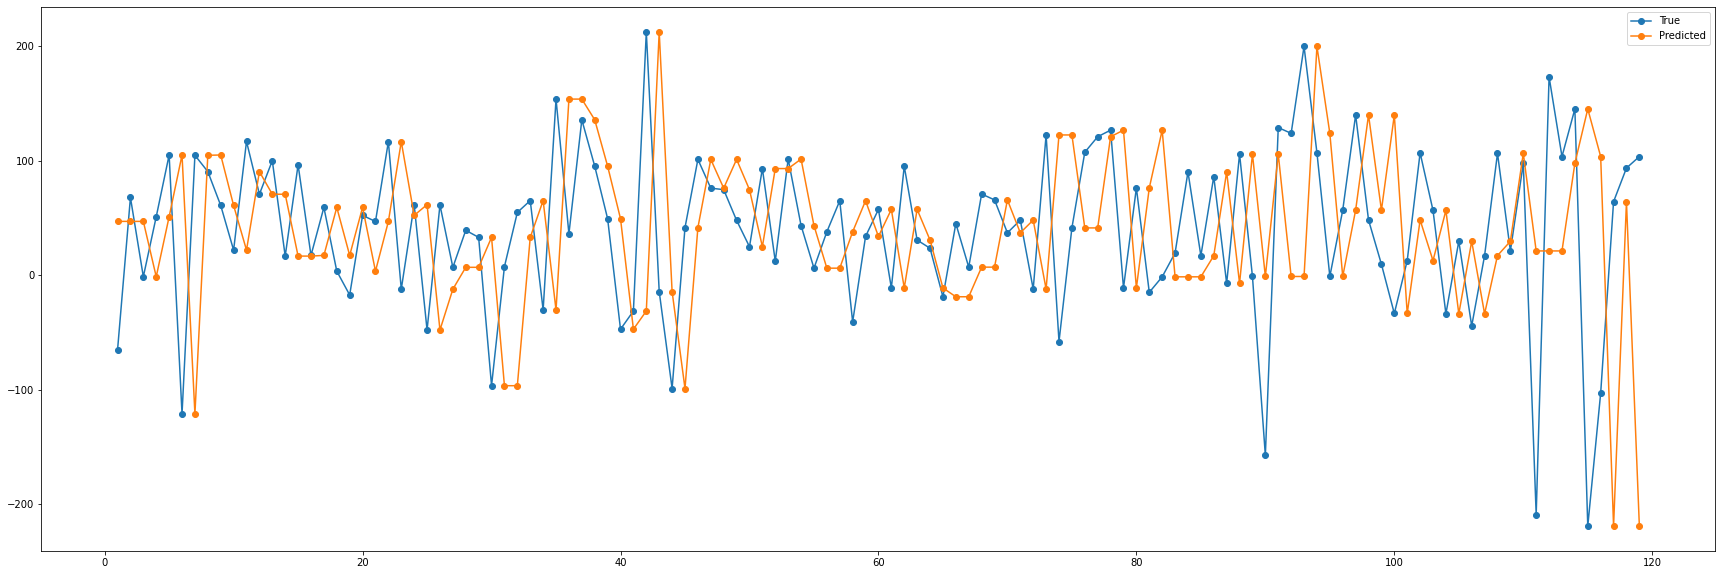

For 5 days timeframe 

117
up_down    10339.3
dtype: object


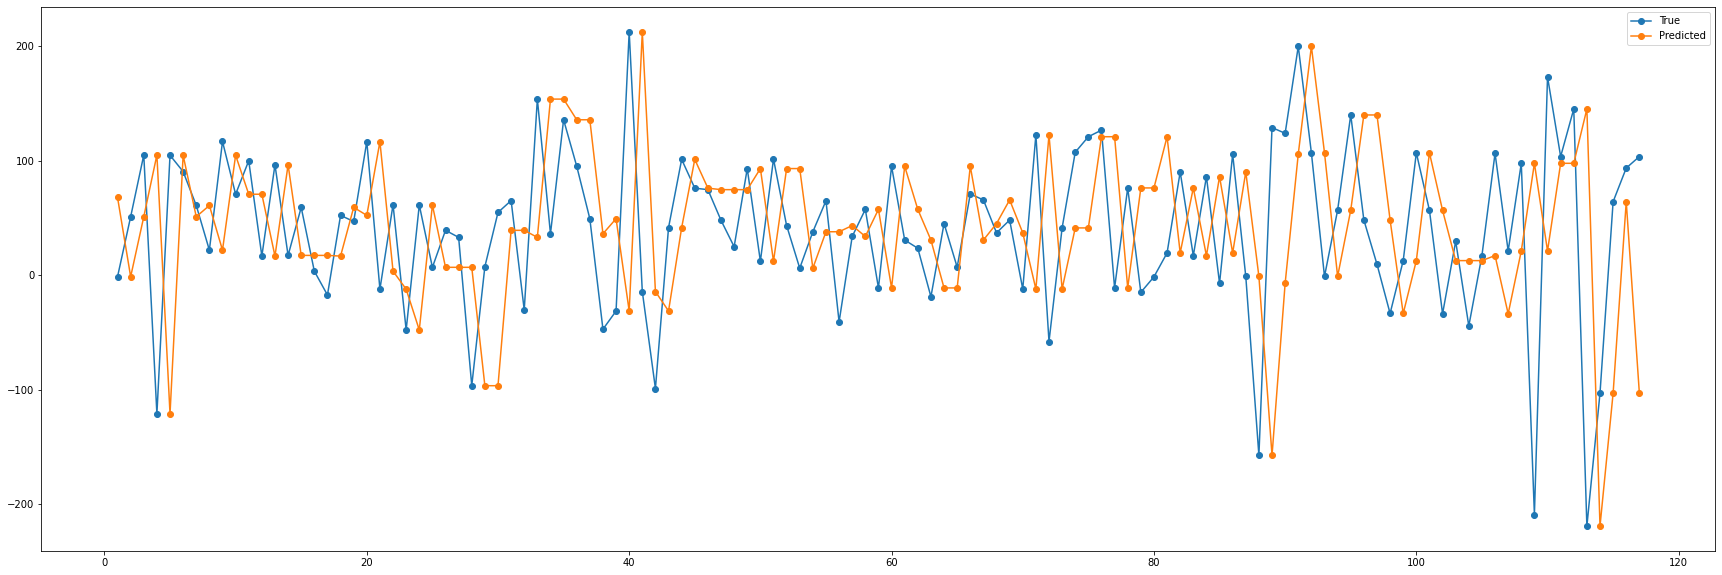

For 7 days timeframe 

115
up_down    9858.49
dtype: object


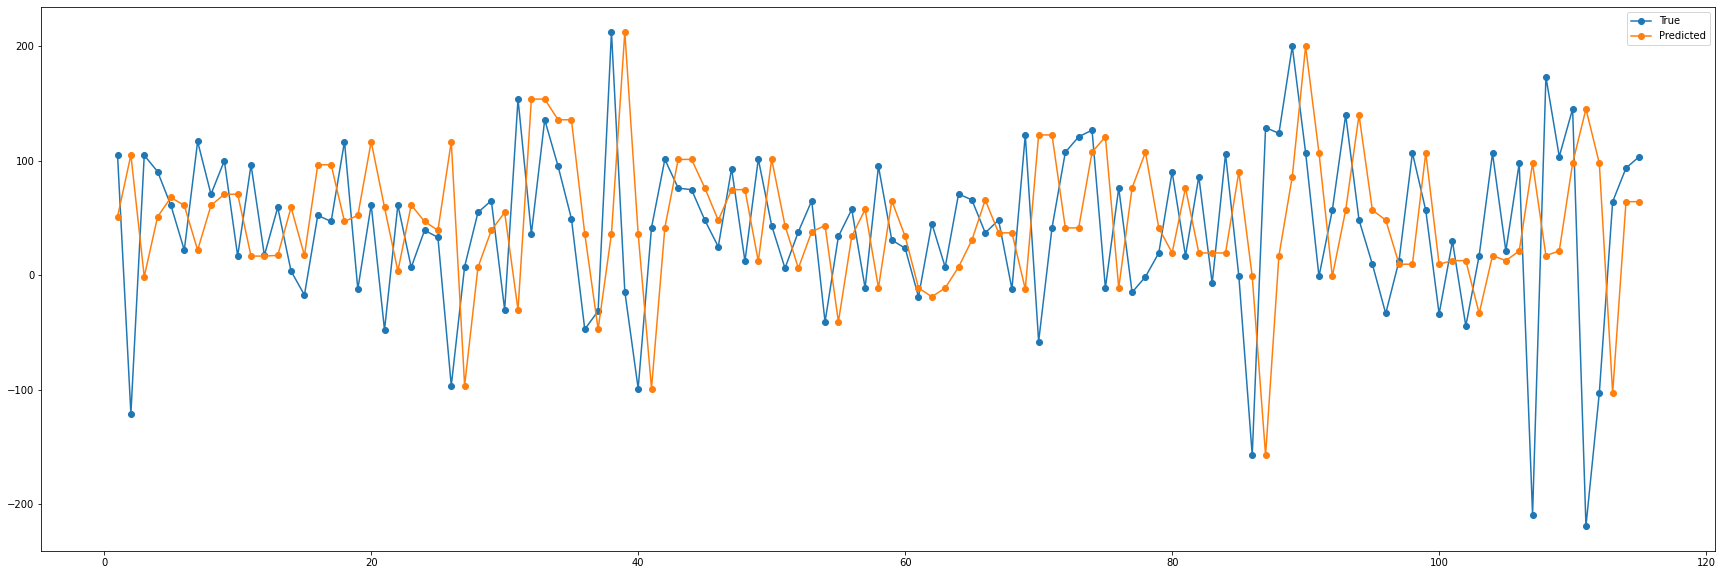

For 9 days timeframe 

113
up_down    8878.73
dtype: object


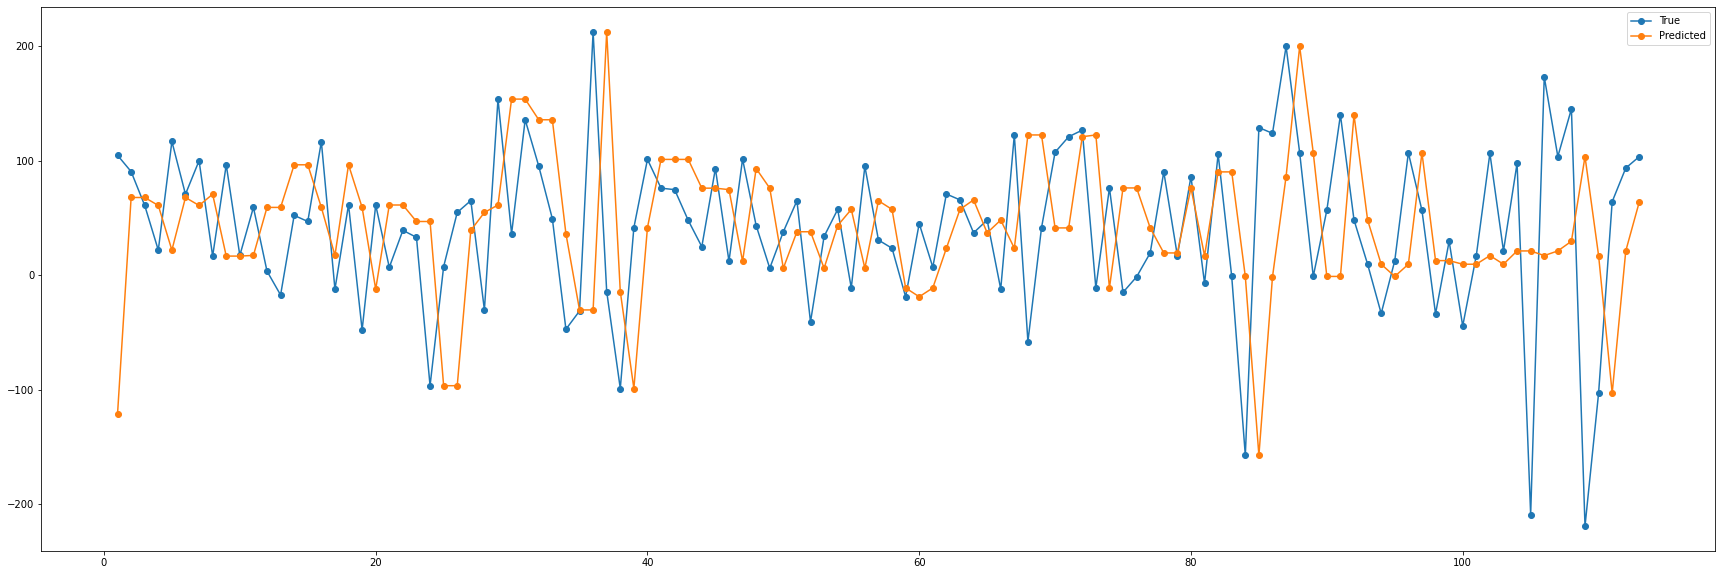

In [ ]:
for k in [3,5,7,9]:
  error_ar=[]
  j=0
  i=0
  y_p = []
  y_t = []
  model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())
  while(j<121):
    model.fit(read.loc[i:i+k,X],read.loc[i:i+k,'up_down'])
    y_pred = model.predict([read.loc[i+k+1,X]])
    y_true = read.loc[i+k+1,Y]
    error_ar.append((y_true-y_pred)**2)
    j=i+k
    i+=1
    y_p.append(y_pred)
    y_t.append(y_true)
  print("For "+str(k)+" days timeframe \n")
  print(len(error_ar))
  print(str(sum(error_ar)/i))
  plt.figure(figsize=(30,10))
  plt.plot([i for i in range(1,i+1)],y_t,marker='o')
  plt.plot([i for i in range(1,i+1)],y_p,marker='o')
  plt.legend(['True','Predicted'])
  plt.show()

Support Vector Regressor

For 3 days timeframe 

119
up_down    6947.25
dtype: object


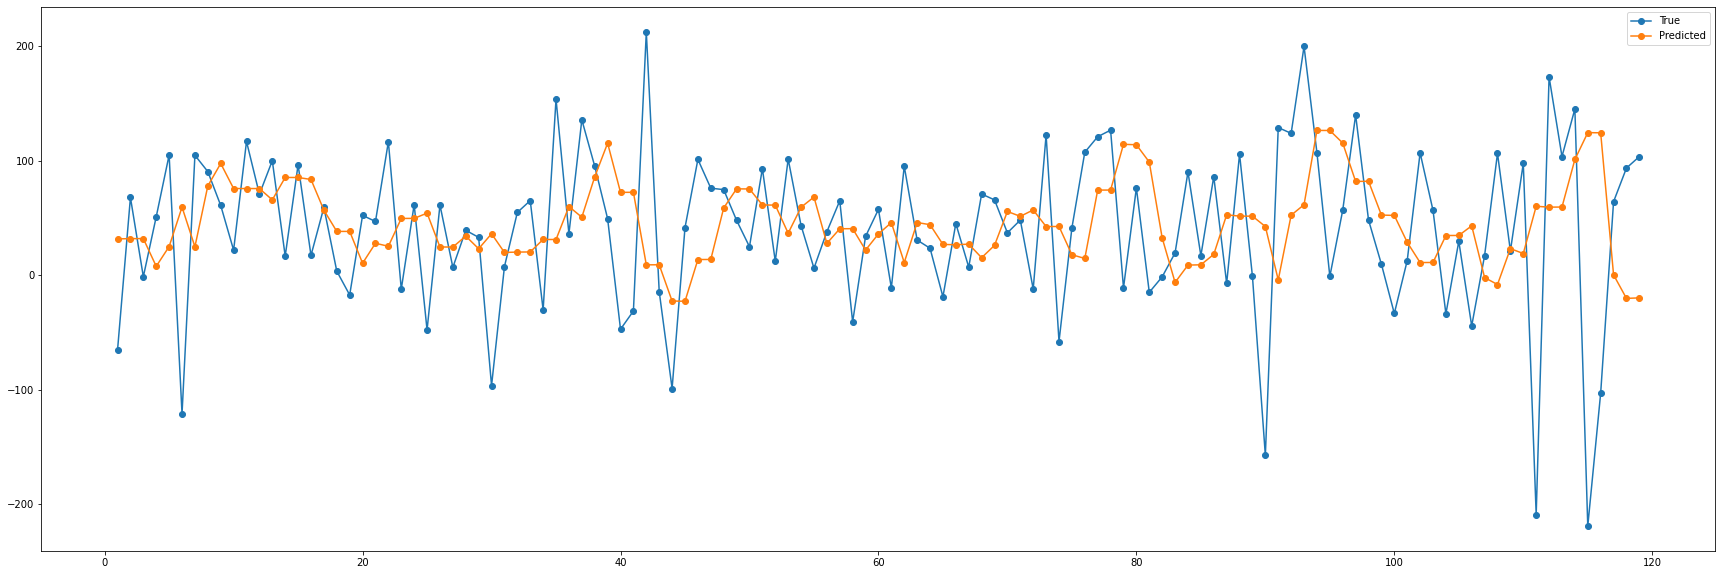

For 5 days timeframe 

117
up_down    6364.18
dtype: object


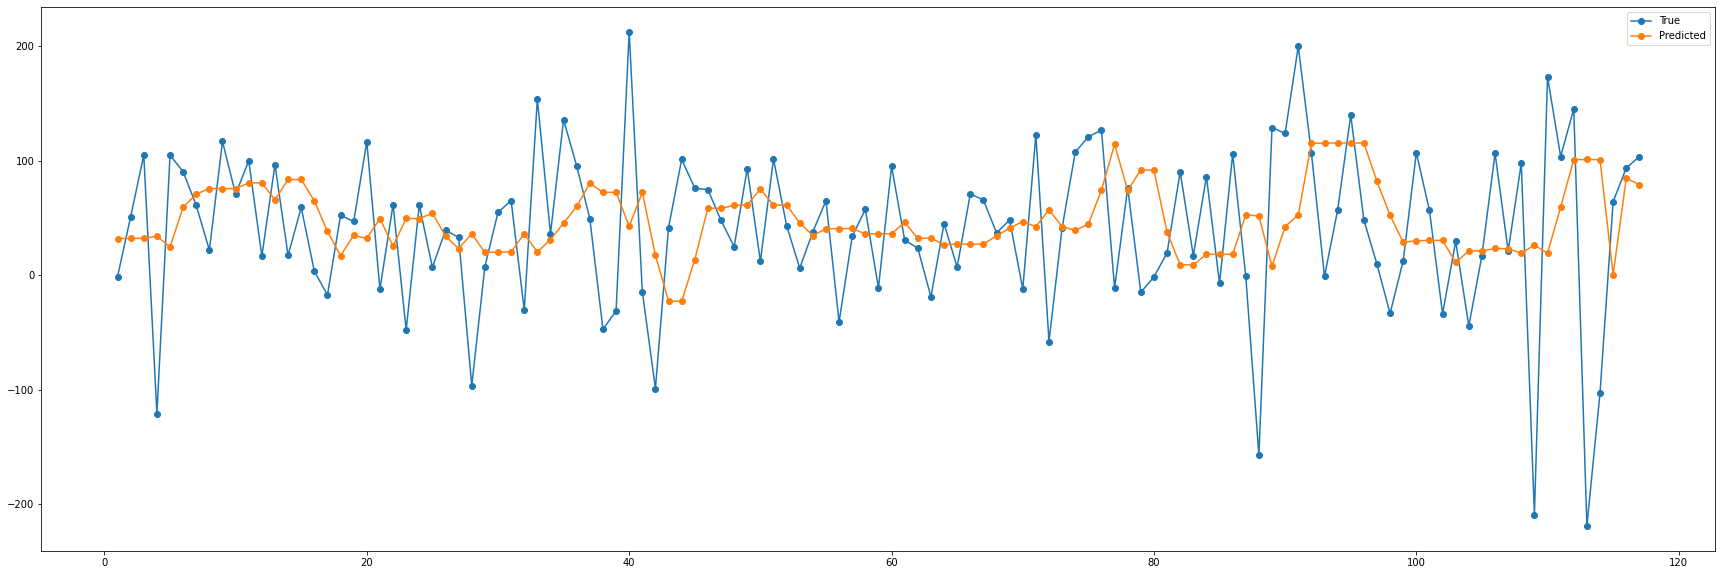

For 7 days timeframe 

115
up_down    6418.23
dtype: object


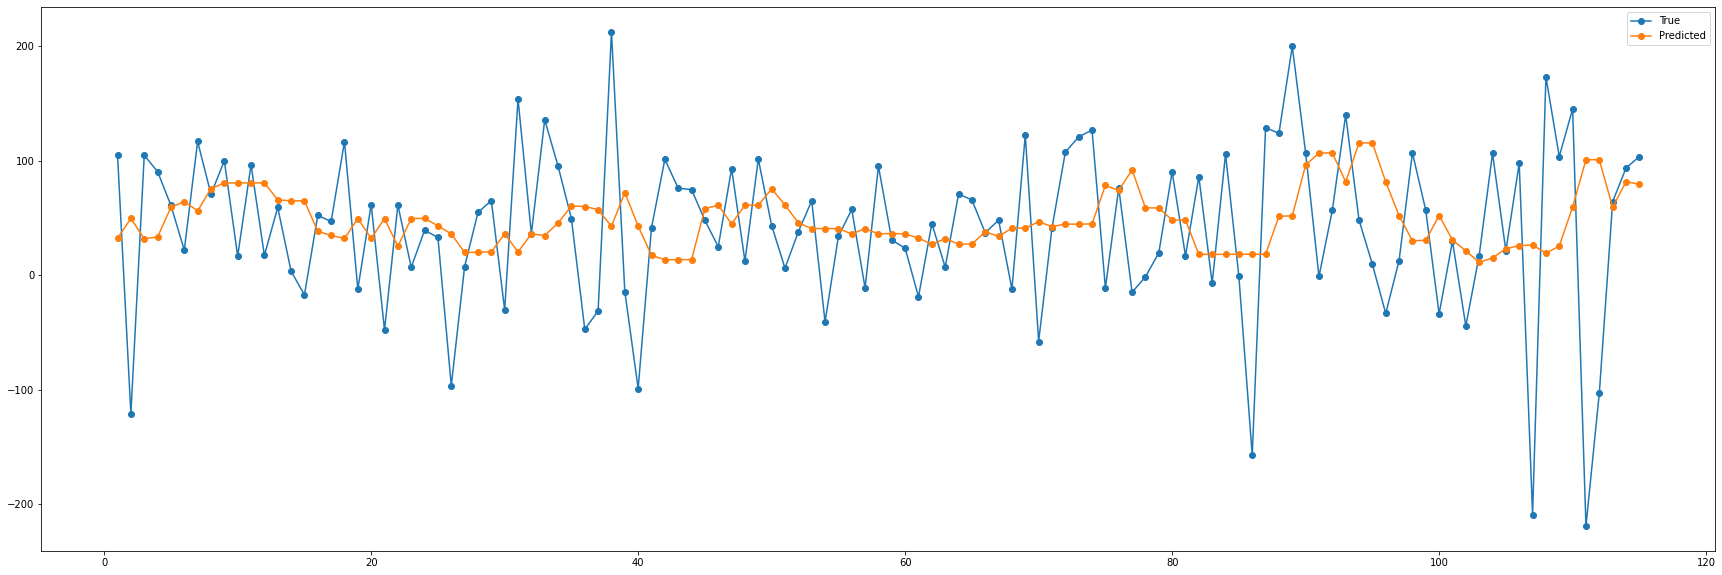

For 9 days timeframe 

113
up_down    5719.53
dtype: object


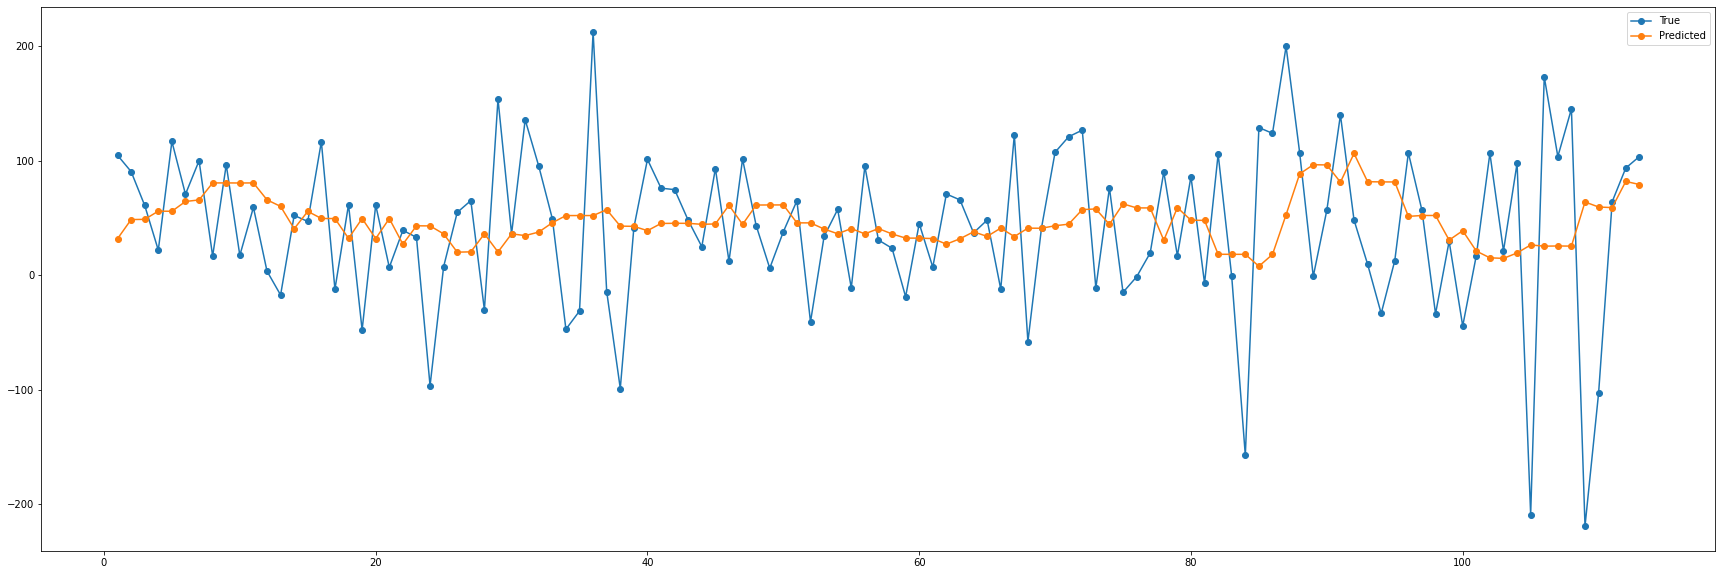

In [ ]:
for k in [3,5,7,9]:
  error_svr=[]
  j=0
  i=0
  y_p = []
  y_t = []
  model = SVR(kernel = 'rbf')
  while(j<121):
    model.fit(read.loc[i:i+k,X],read.loc[i:i+k,'up_down'])
    y_pred = model.predict([read.loc[i+k+1,X]])
    y_true = read.loc[i+k+1,Y]
    error_svr.append((y_true-y_pred)**2)
    j=i+k
    i+=1
    y_p.append(y_pred)
    y_t.append(y_true)
  print("For "+str(k)+" days timeframe \n")
  print(len(error_svr))
  print(str(sum(error_svr)/i))
  plt.figure(figsize=(30,10))
  plt.plot([i for i in range(1,i+1)],y_t,marker='o')
  plt.plot([i for i in range(1,i+1)],y_p,marker='o')
  plt.legend(['True','Predicted'])
  plt.show()

KNN Regressor

For 3 days timeframe 

119
up_down    8593.82
dtype: object


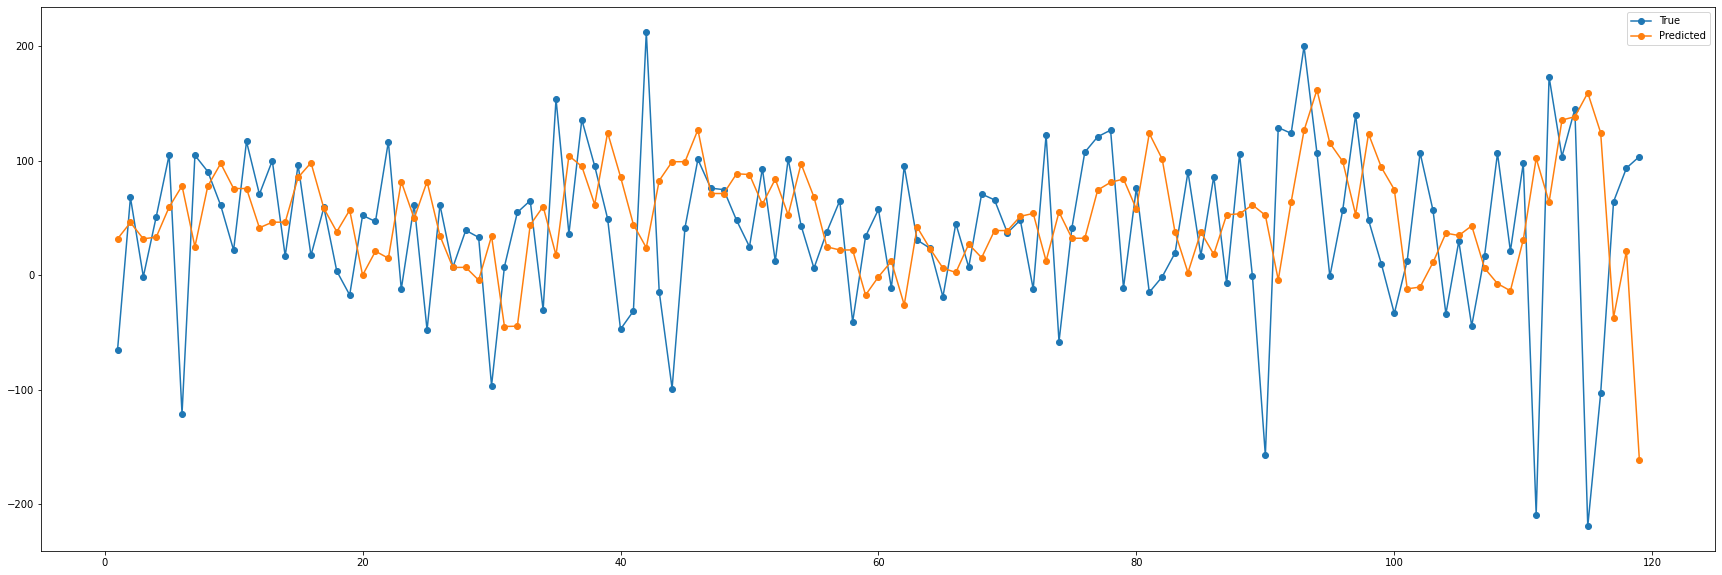

For 5 days timeframe 

117
up_down    6649.7
dtype: object


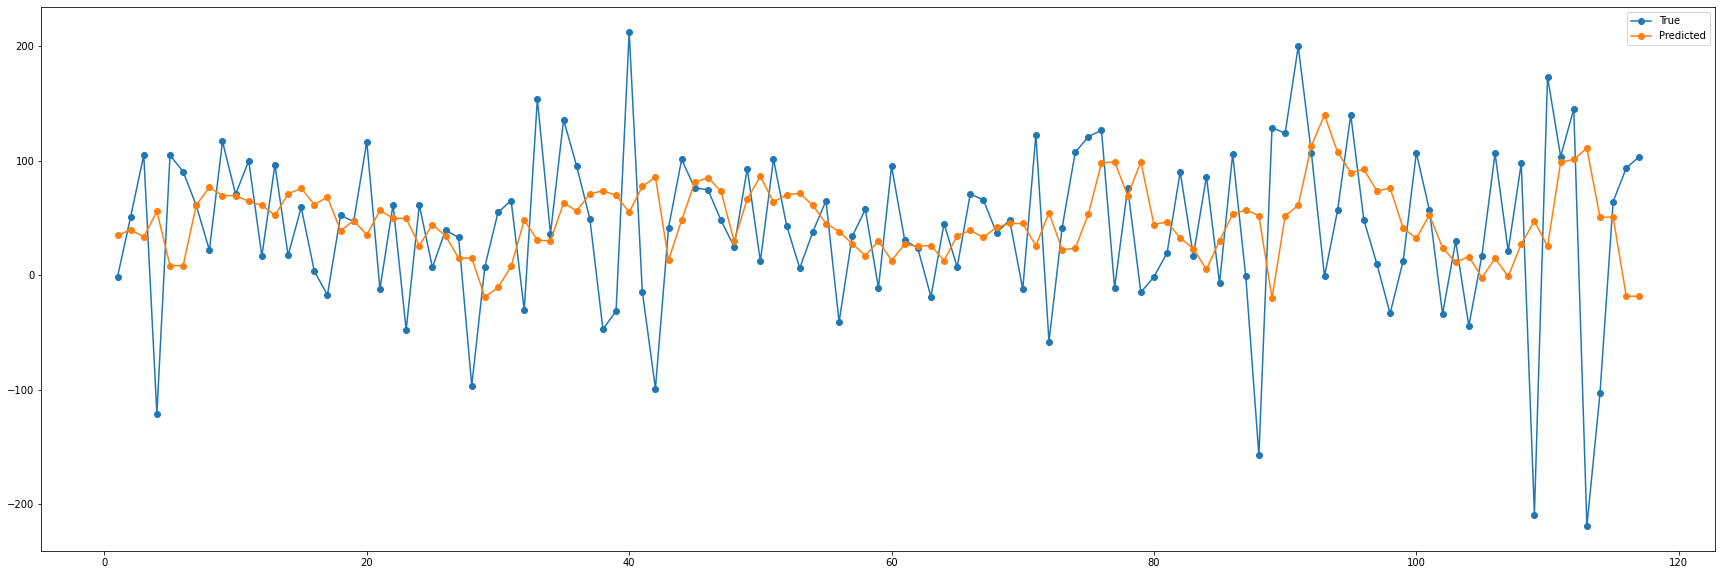

For 7 days timeframe 

115
up_down    6676.32
dtype: object


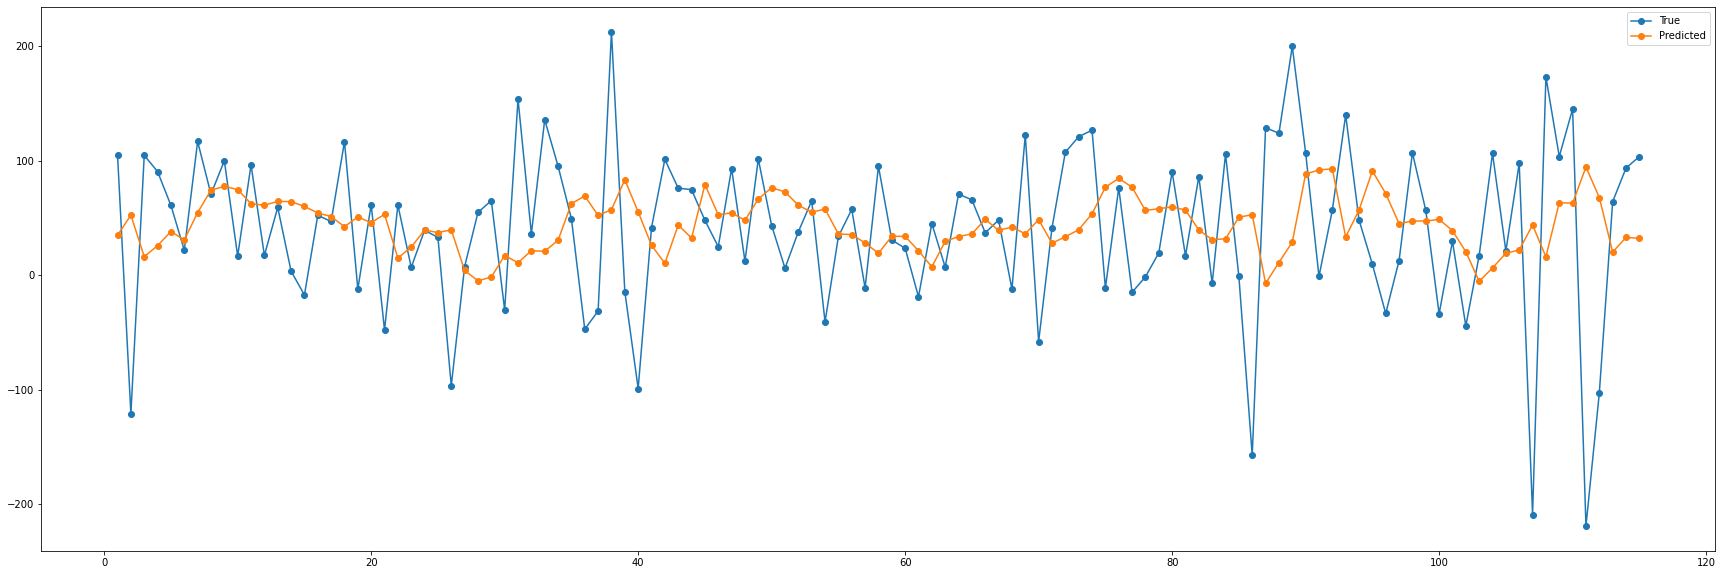

For 9 days timeframe 

113
up_down    5954.24
dtype: object


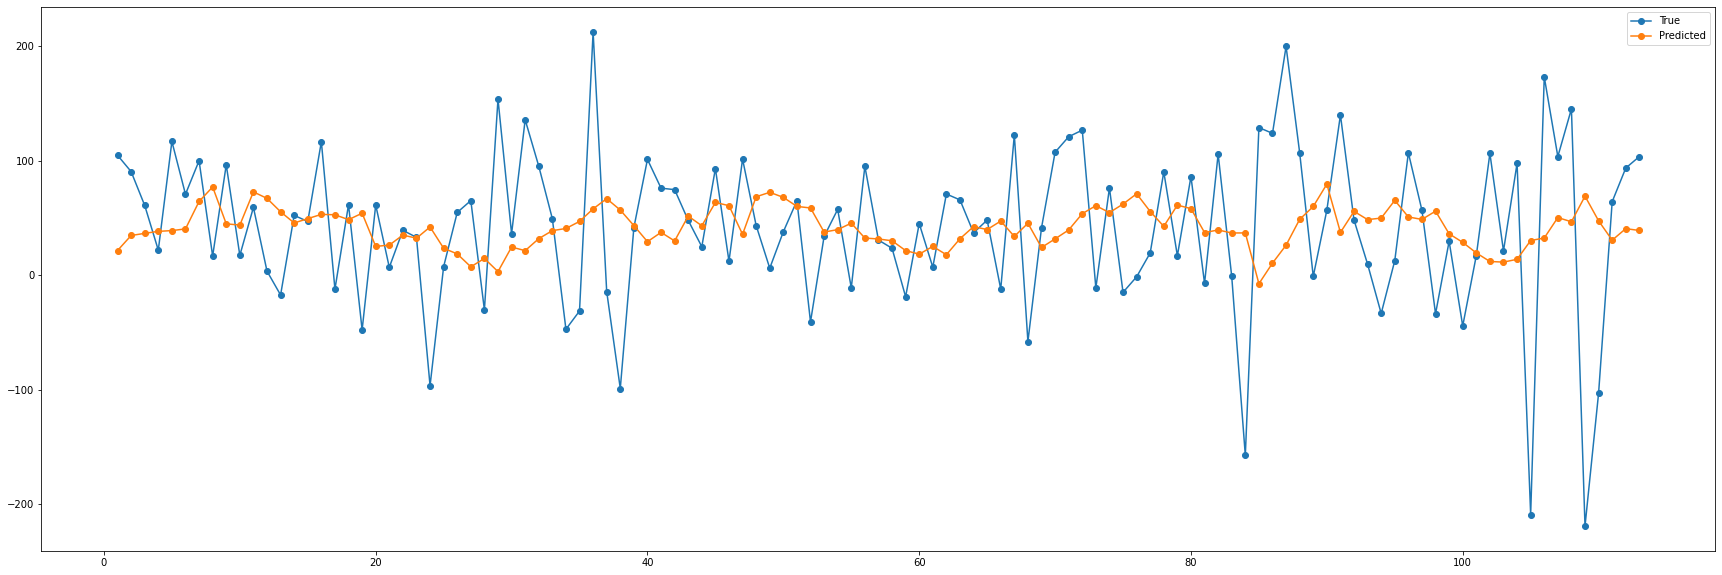

In [ ]:
for k in [3,5,7,9]:
  error_knn=[]
  j=0
  i=0
  y_p = []
  y_t = []
  model = KNeighborsRegressor(n_neighbors=k-1,n_jobs=-1)
  while(j<121):
    model.fit(read.loc[i:i+k,X],read.loc[i:i+k,'up_down'])
    y_pred = model.predict([read.loc[i+k+1,X]])
    y_true = read.loc[i+k+1,Y]
    error_knn.append((y_true-y_pred)**2)
    j=i+k
    i+=1
    y_p.append(y_pred)
    y_t.append(y_true)
  print("For "+str(k)+" days timeframe \n")
  print(len(error_knn))
  print(str(sum(error_knn)/i))
  plt.figure(figsize=(30,10))
  plt.plot([i for i in range(1,i+1)],y_t,marker='o')
  plt.plot([i for i in range(1,i+1)],y_p,marker='o')
  plt.legend(['True','Predicted'])
  plt.show()

Linear Regressor

For 3 days timeframe 

119
up_down    48311.1
dtype: object


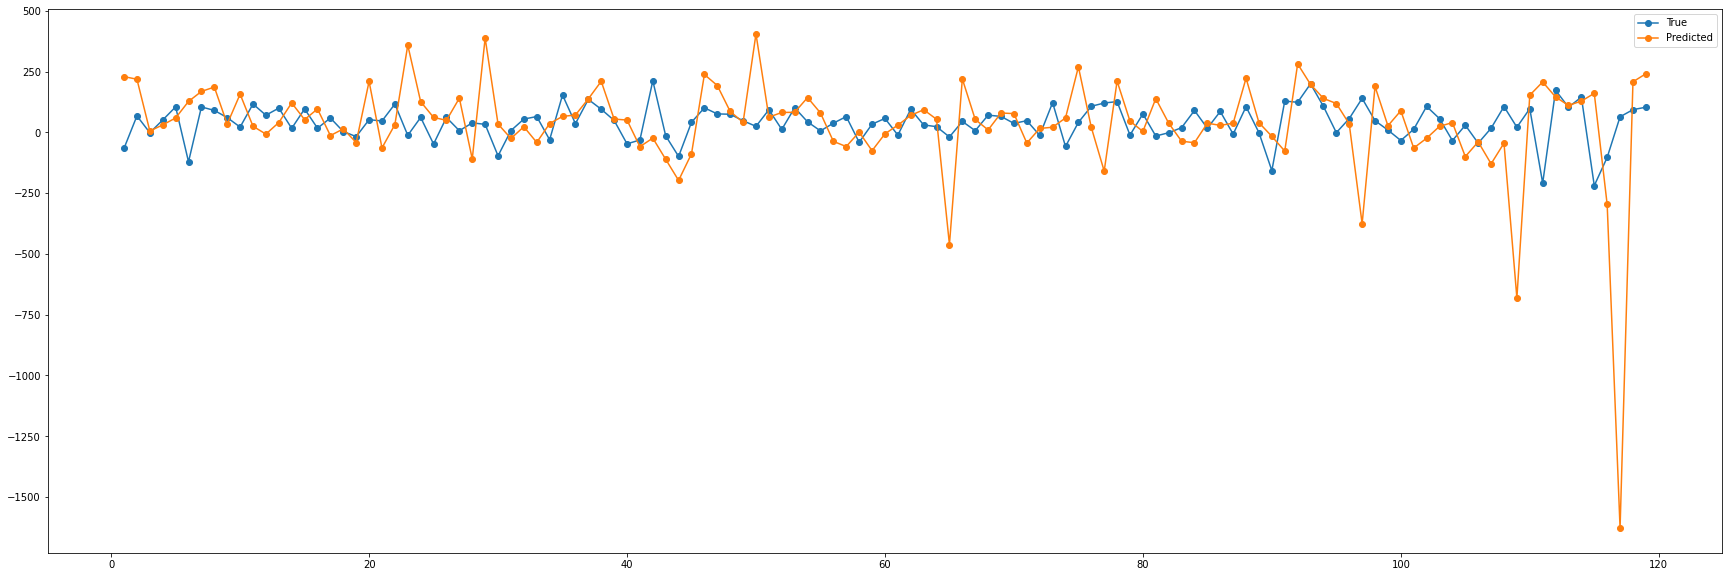

For 5 days timeframe 

117
up_down    27893
dtype: object


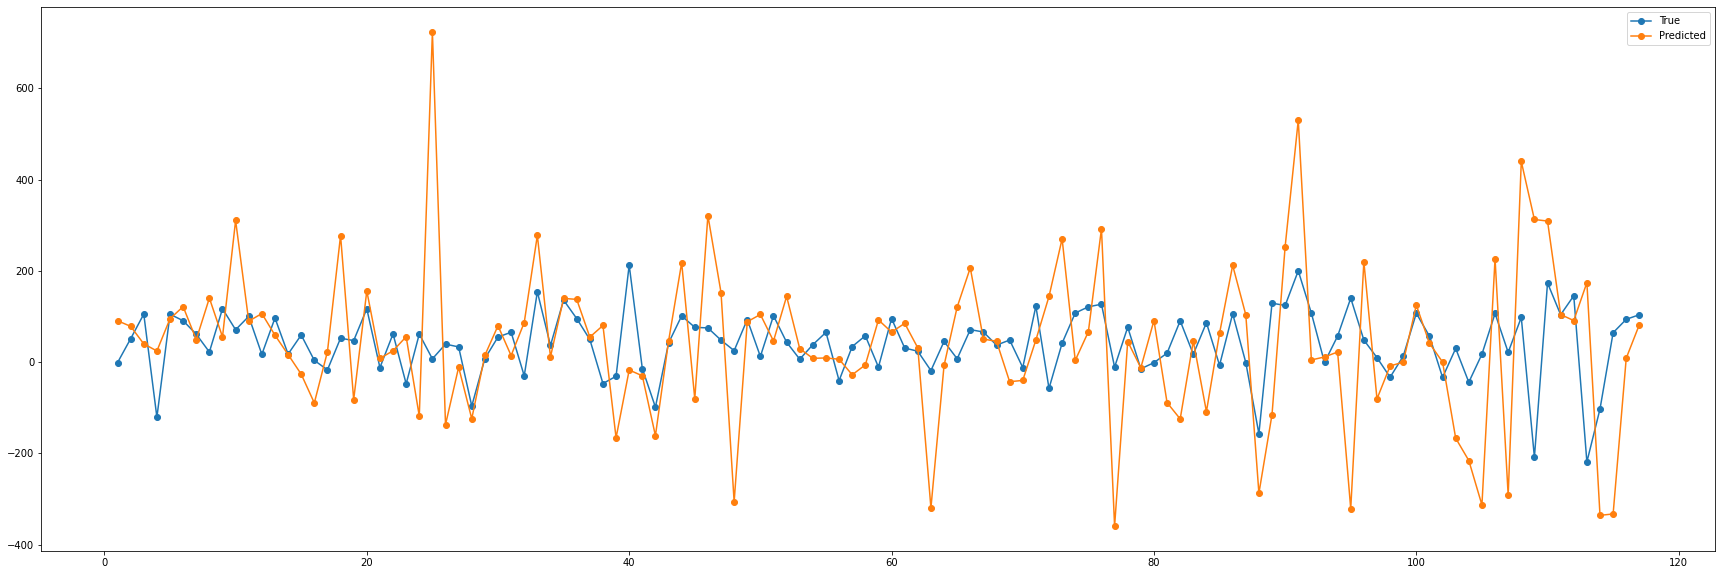

For 7 days timeframe 

115
up_down    127591
dtype: object


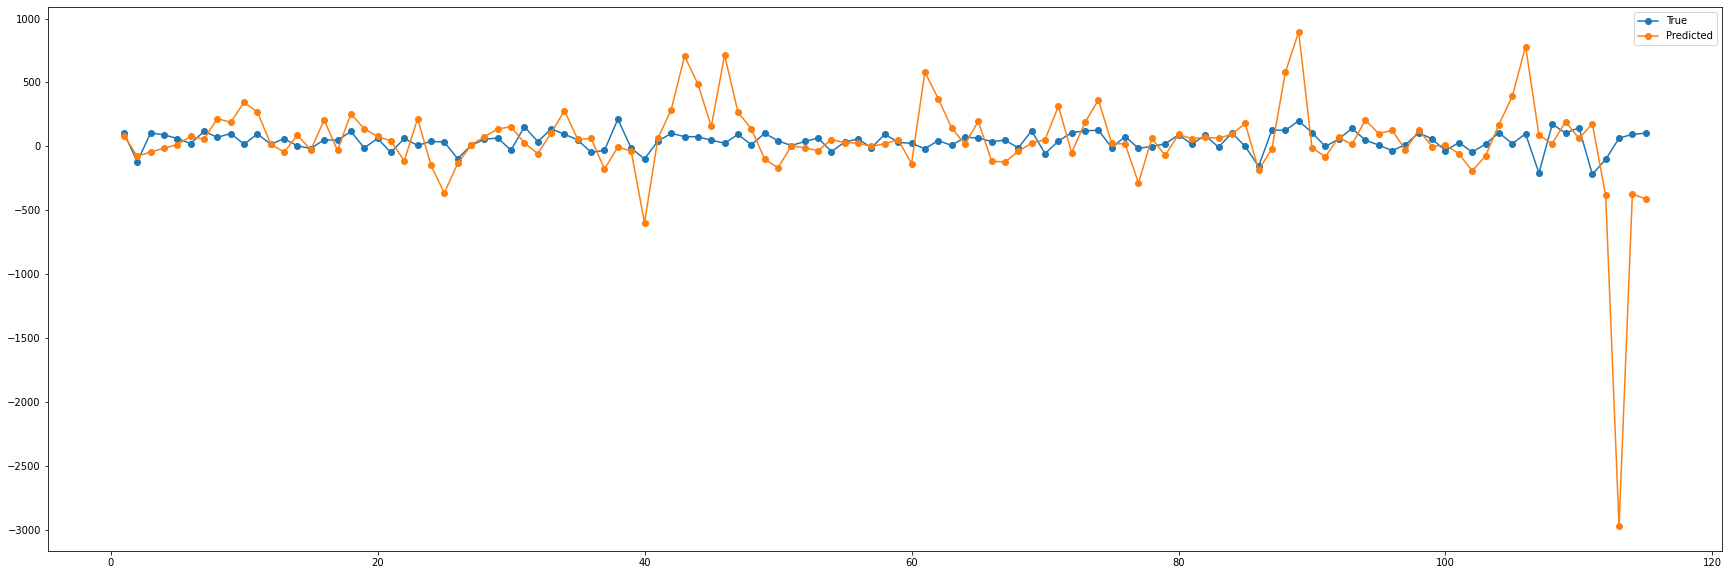

For 9 days timeframe 

113
up_down    1.17059e+07
dtype: object


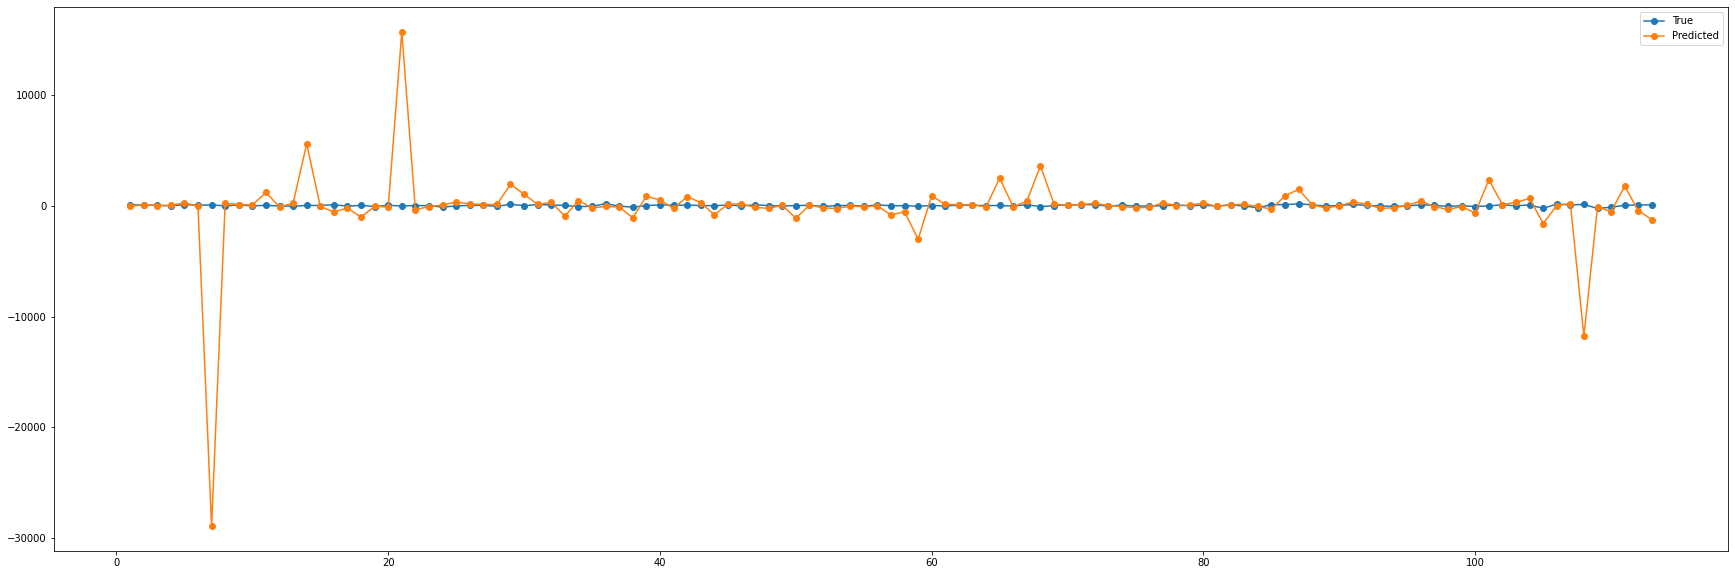

In [ ]:
for k in [3,5,7,9]:
  error_lr=[]
  j=0
  i=0
  y_p = []
  y_t = []
  model = LinearRegression(fit_intercept=False,normalize=True,n_jobs=-1)
  while(j<121):
    model.fit(read.loc[i:i+k,X],read.loc[i:i+k,'up_down'])
    y_pred = model.predict([read.loc[i+k+1,X]])
    y_true = read.loc[i+k+1,Y]
    error_lr.append((y_true-y_pred)**2)
    j=i+k
    i+=1
    y_p.append(y_pred)
    y_t.append(y_true)
  print("For "+str(k)+" days timeframe \n")
  print(len(error_lr))
  print(str(sum(error_lr)/i))
  plt.figure(figsize=(30,10))
  plt.plot([i for i in range(1,i+1)],y_t,marker='o')
  plt.plot([i for i in range(1,i+1)],y_p,marker='o')
  plt.legend(['True','Predicted'])
  plt.show()

Decision Tree Classifier

For time frame of 3 days the accuracy is 0.5378151260504201



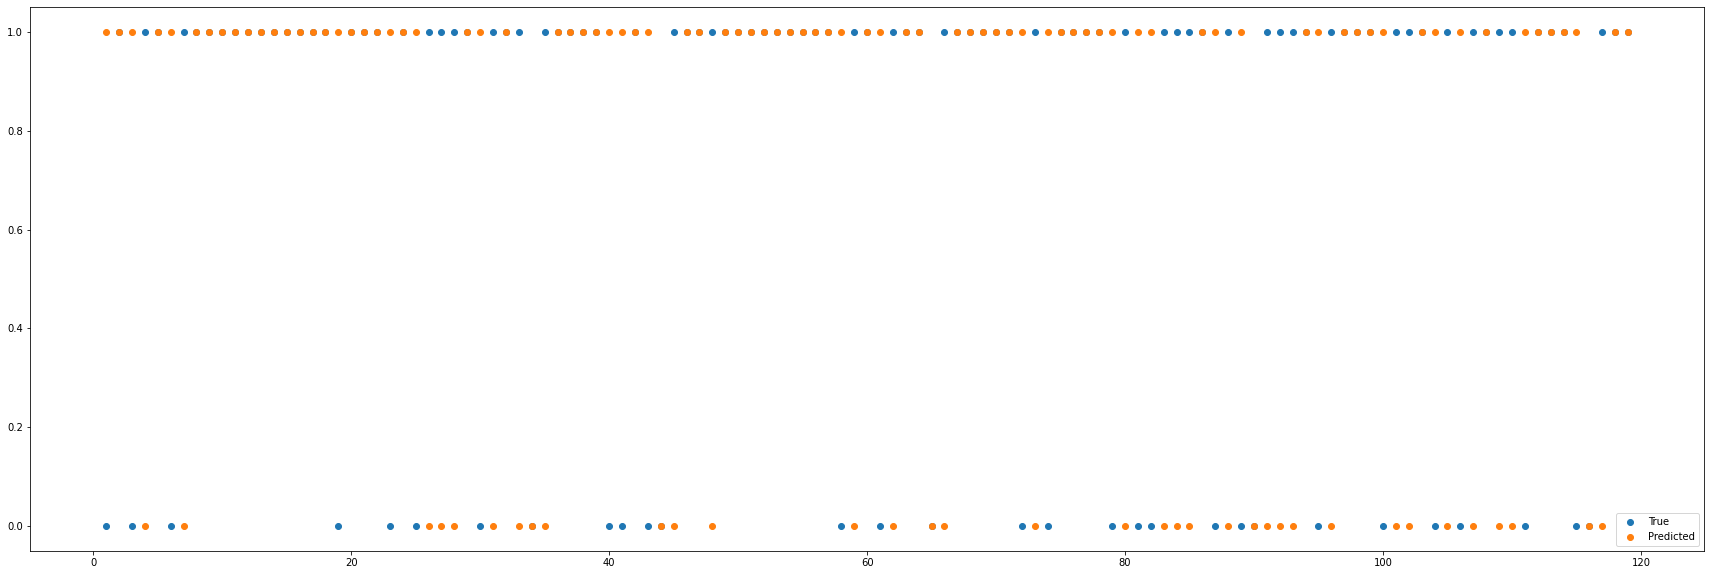

For time frame of 5 days the accuracy is 0.5726495726495726



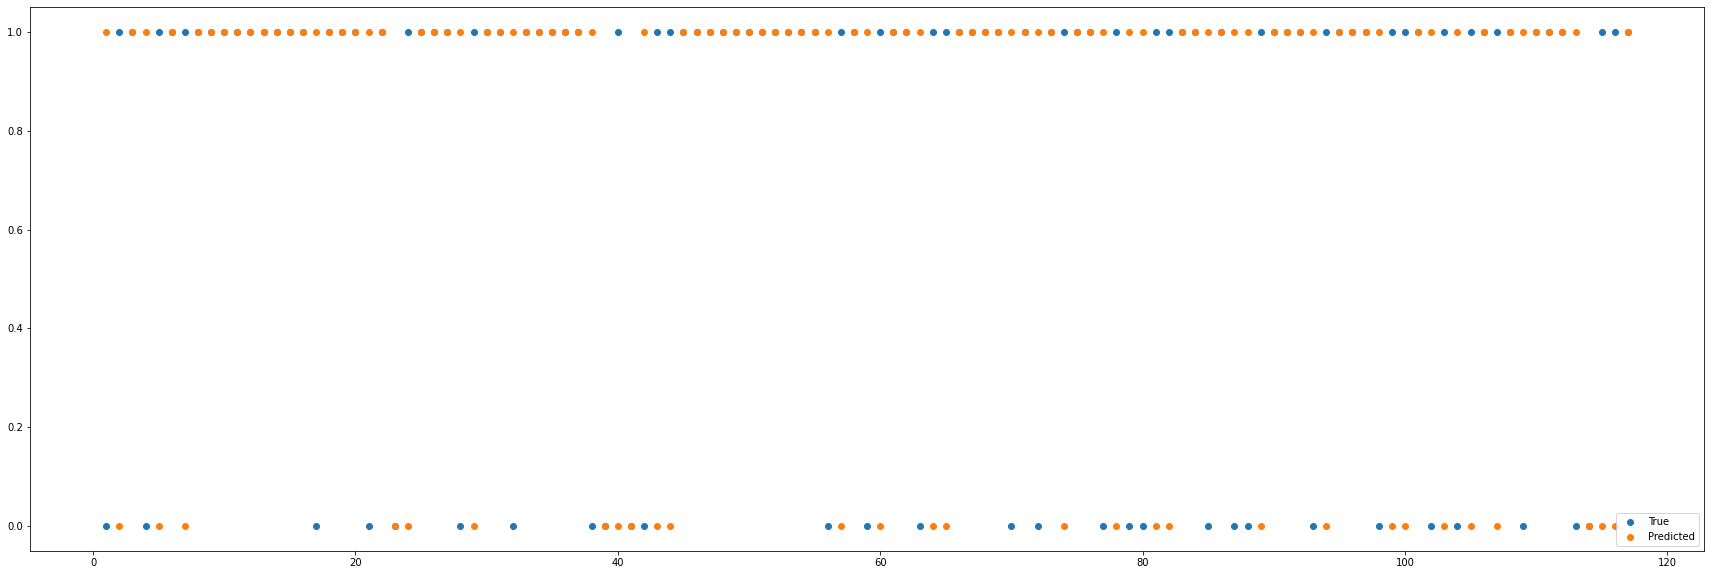

For time frame of 7 days the accuracy is 0.5304347826086957



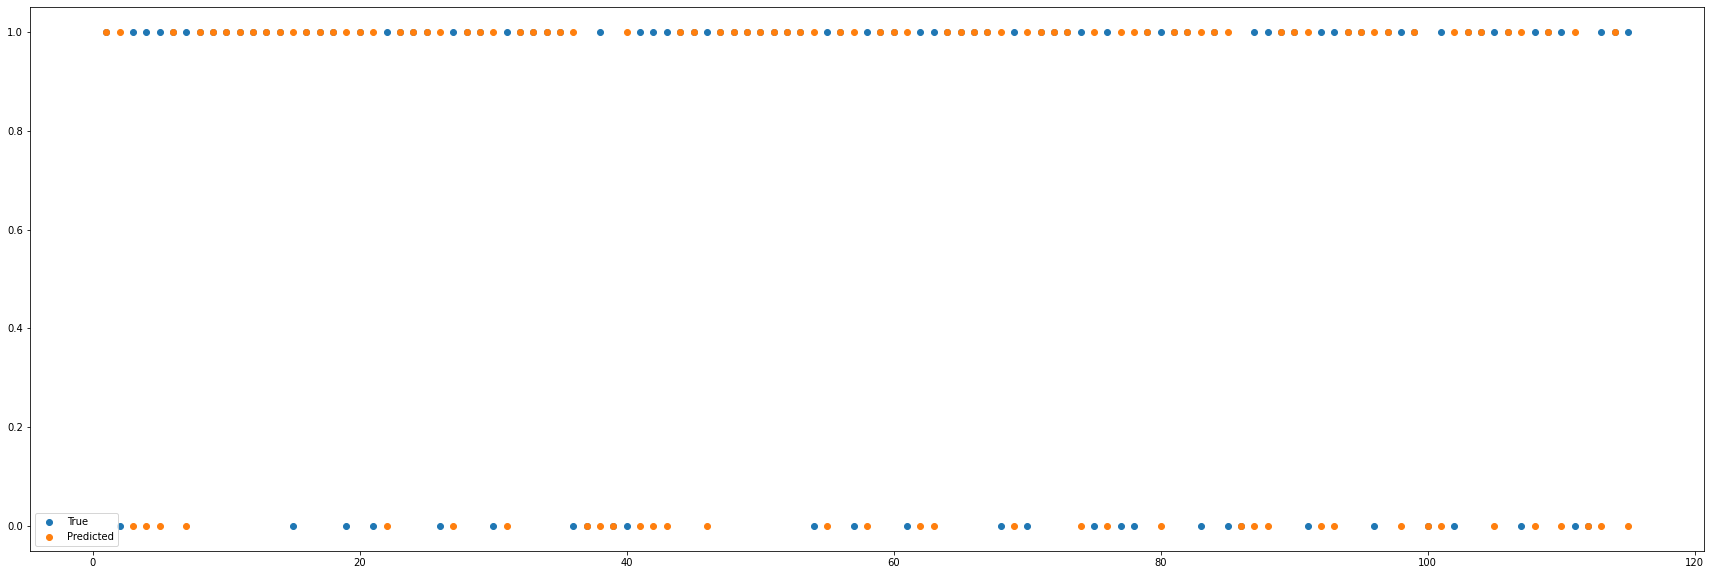

For time frame of 9 days the accuracy is 0.5486725663716814



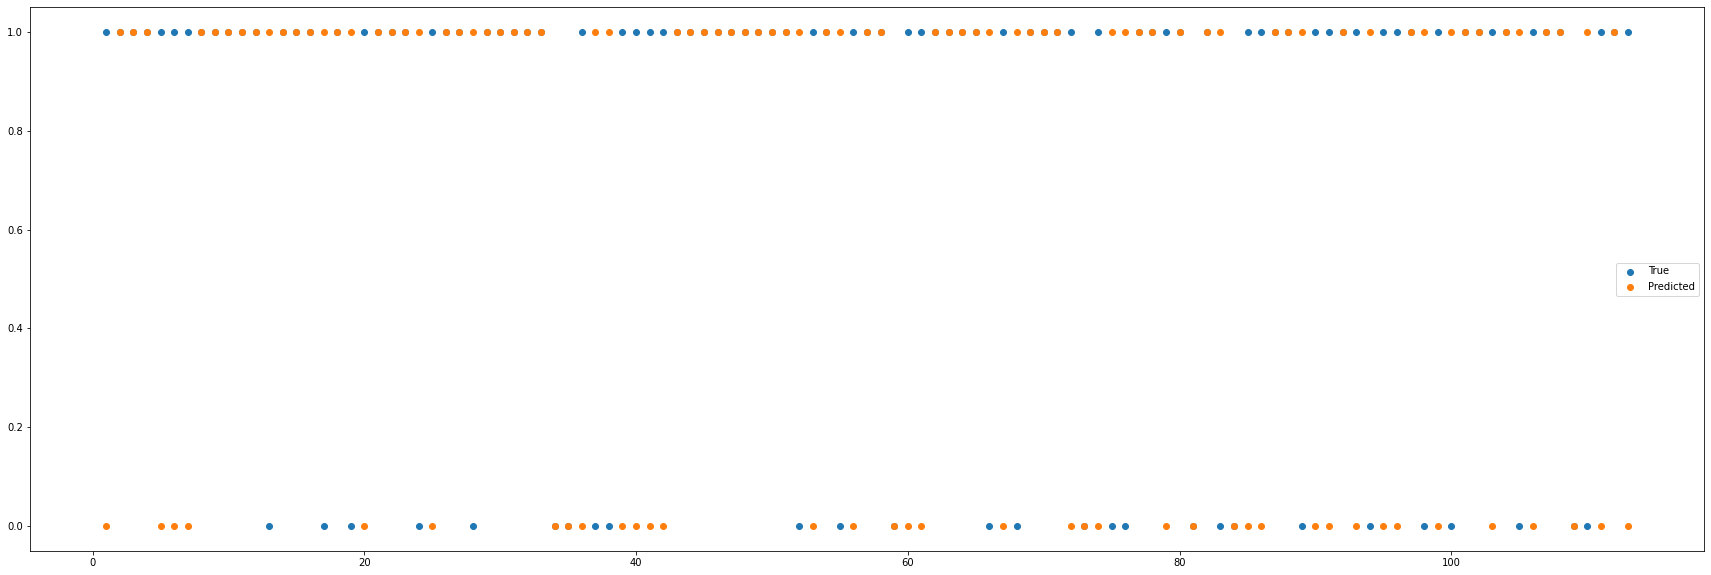

In [ ]:
for k in [3,5,7,9]:
  pred_dtc = []
  true_dtc = []
  i=0
  j=0
  model = DecisionTreeClassifier()
  while(j<121):
    model.fit(read.loc[i:i+k,X],read.loc[i:i+k,Y_class].values.ravel())
    y_pred = model.predict([read.loc[i+k+1,X]])
    y_true = read.loc[i+k+1,Y_class]
    pred_dtc.append(y_pred[0].astype('int'))
    true_dtc.append(y_true.astype('int'))
    j=i+k
    i+=1
  print("For time frame of "+str(k)+" days the accuracy is "+str(accuracy_score(true_dtc,pred_dtc))+"\n")
  plt.figure(figsize=(30,10))
  plt.scatter([i for i in range(1,i+1)],true_dtc,marker='o')
  plt.scatter([i for i in range(1,i+1)],pred_dtc,marker='o')
  plt.legend(['True','Predicted'])
  plt.show()

Random Forest Classifier

For time frame of 3 days the accuracy is 0.5714285714285714



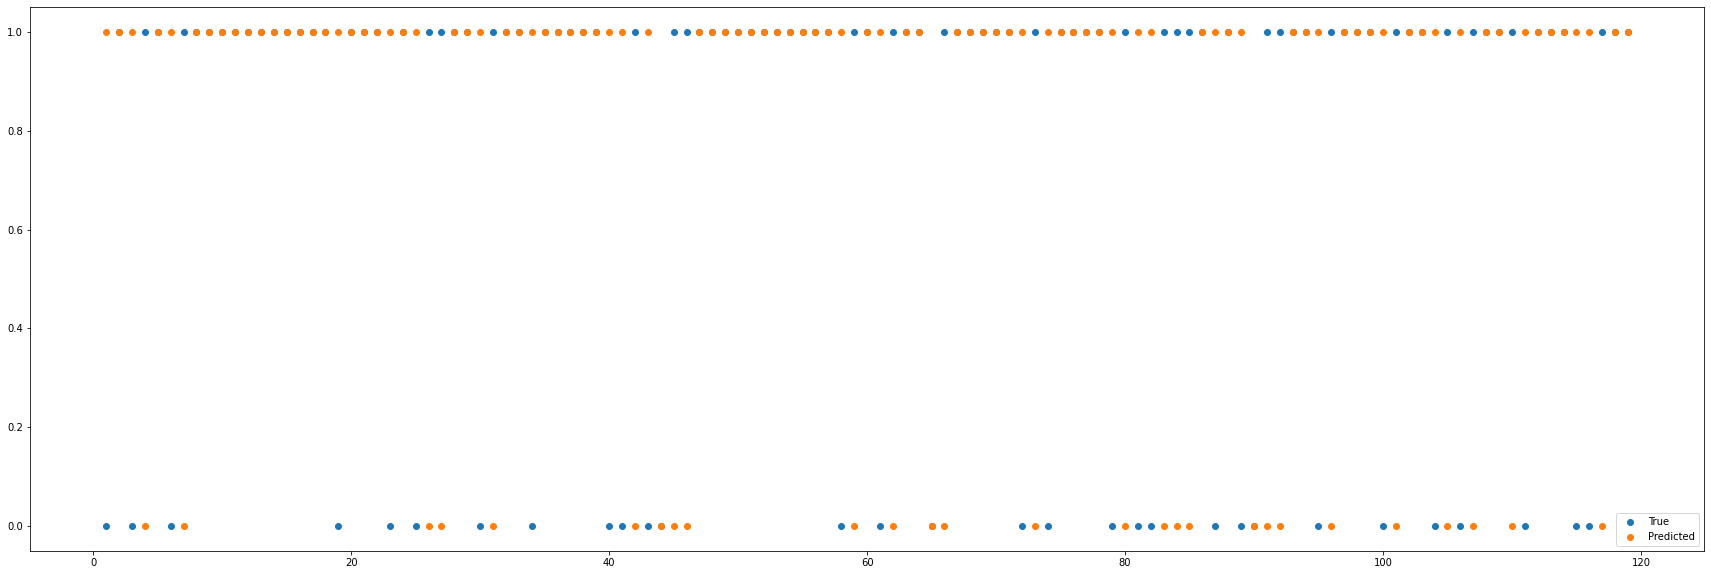

For time frame of 5 days the accuracy is 0.5982905982905983



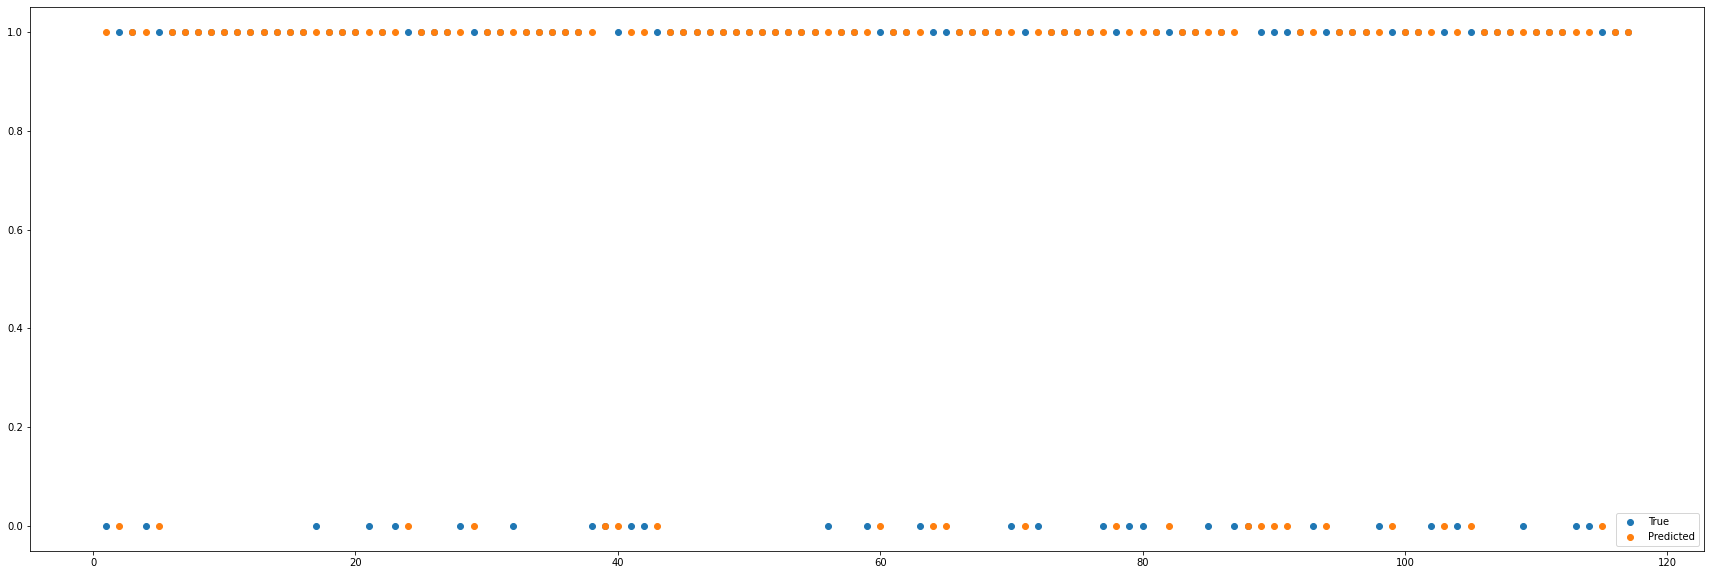

For time frame of 7 days the accuracy is 0.6



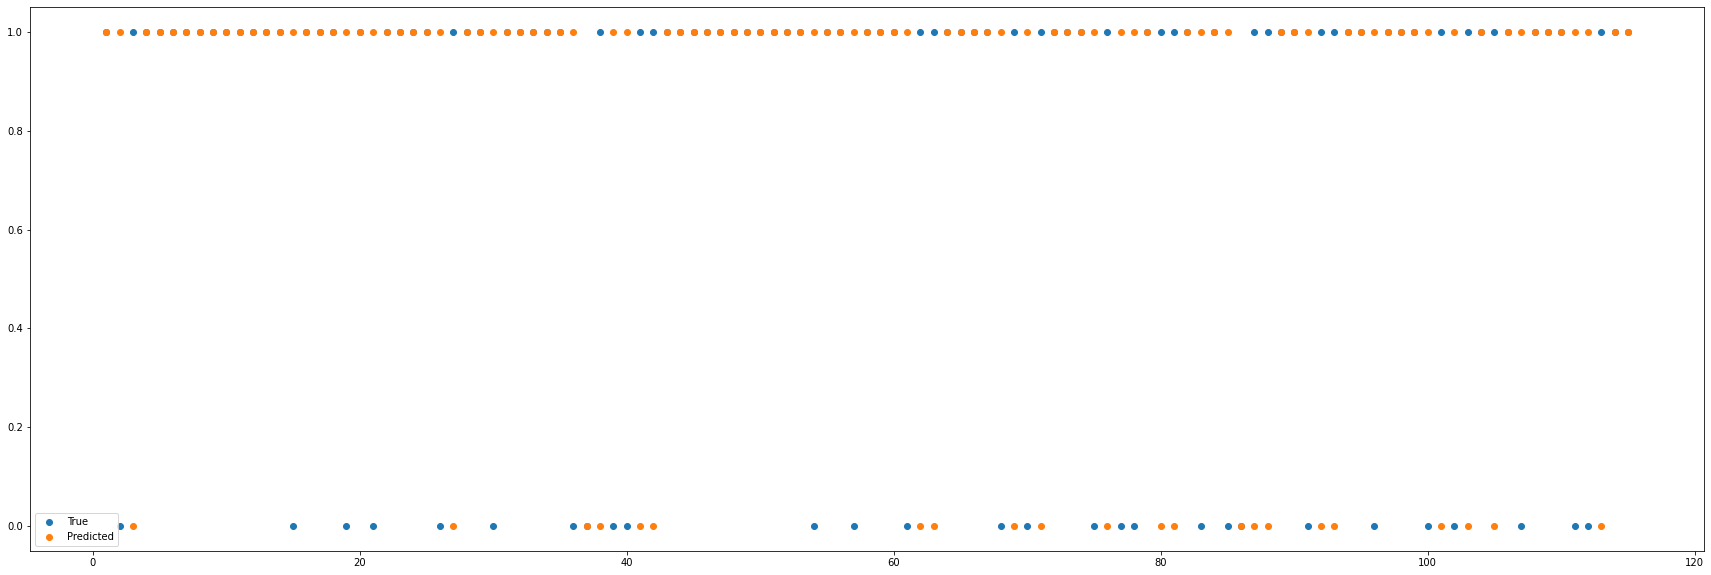

For time frame of 9 days the accuracy is 0.6106194690265486



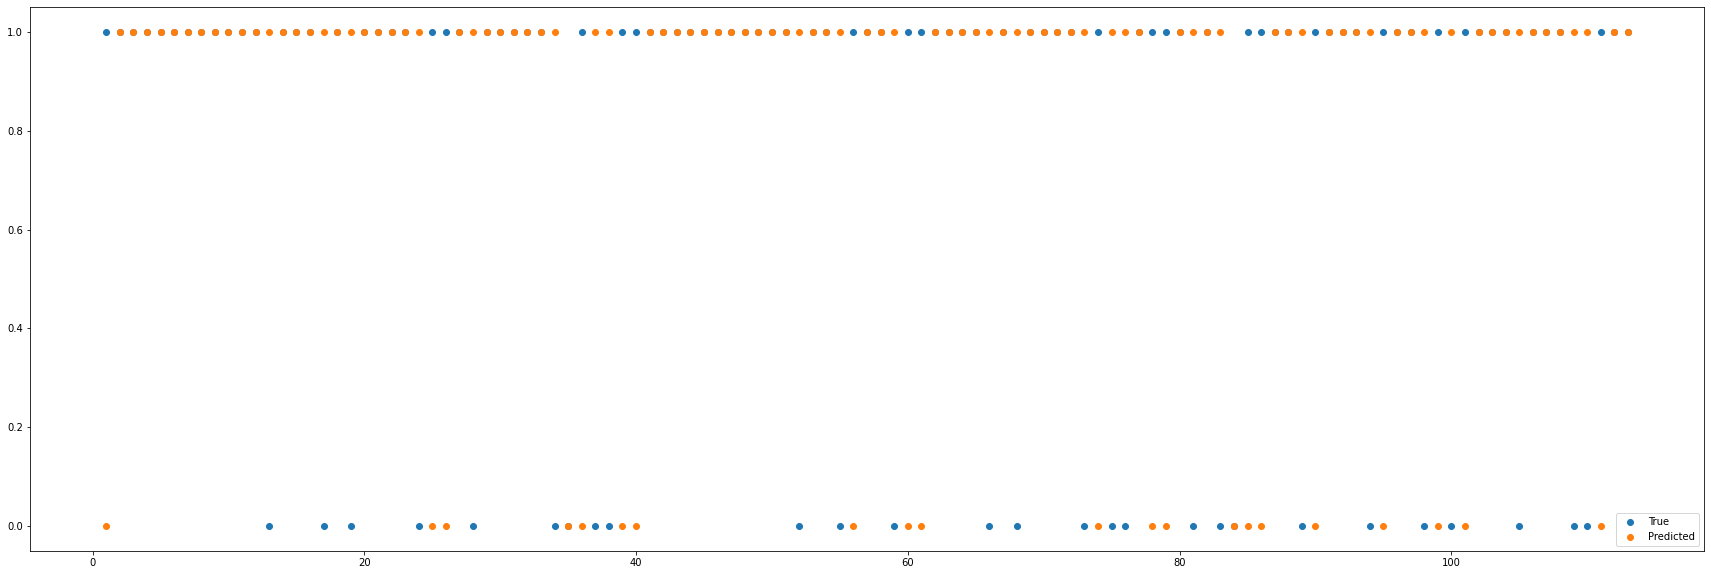

In [ ]:
for k in [3,5,7,9]:
  pred_rf = []
  true_rf = []
  i=0
  j=0
  model = RandomForestClassifier(n_jobs=-1)
  while(j<121):
    model.fit(read.loc[i:i+k,X],read.loc[i:i+k,Y_class].values.ravel())
    y_pred = model.predict([read.loc[i+k+1,X]])
    y_true = read.loc[i+k+1,Y_class]
    pred_rf.append(y_pred[0].astype('int'))
    true_rf.append(y_true.astype('int'))
    j=i+k
    i+=1
  print("For time frame of "+str(k)+" days the accuracy is "+str(accuracy_score(true_rf,pred_rf))+"\n")
  plt.figure(figsize=(30,10))
  plt.scatter([i for i in range(1,i+1)],true_rf,marker='o')
  plt.scatter([i for i in range(1,i+1)],pred_rf,marker='o')
  plt.legend(['True','Predicted'])
  plt.show()

Bagging Classifier

For time frame of 3 days the accuracy is 0.5210084033613446



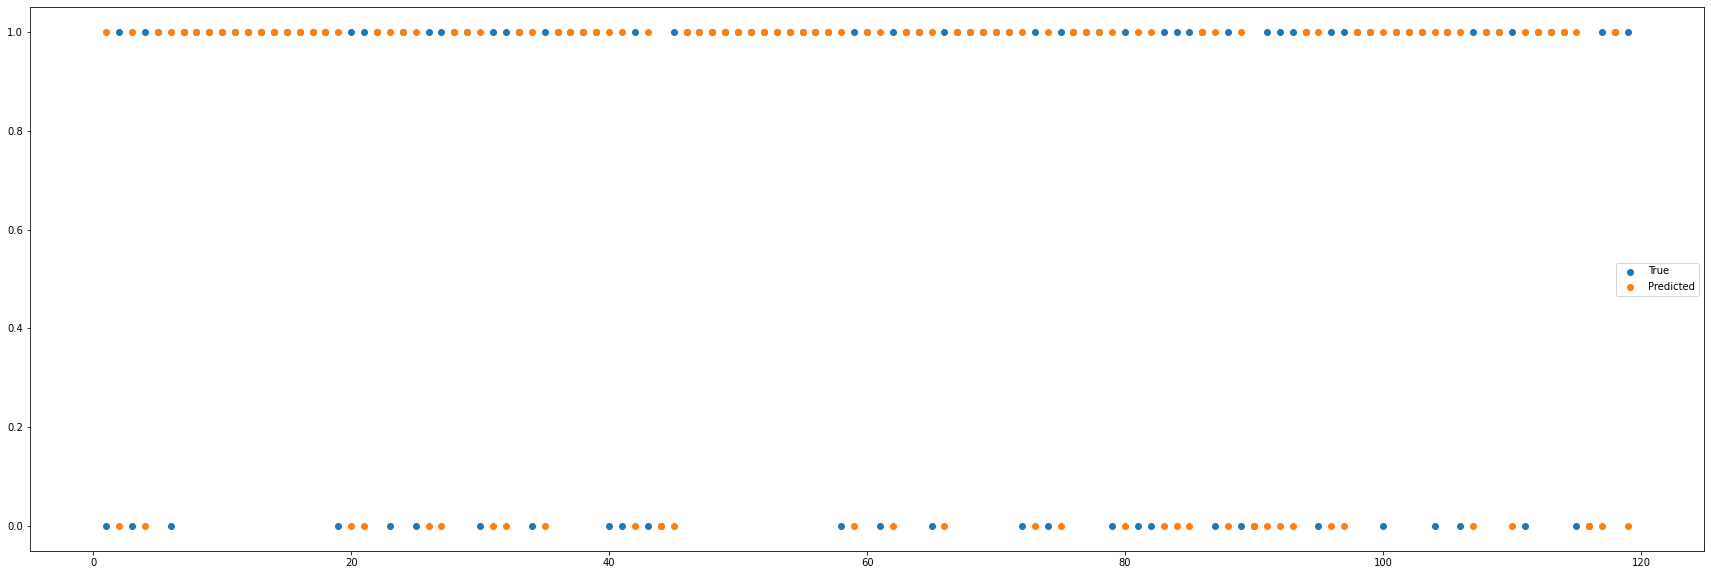

For time frame of 5 days the accuracy is 0.6153846153846154



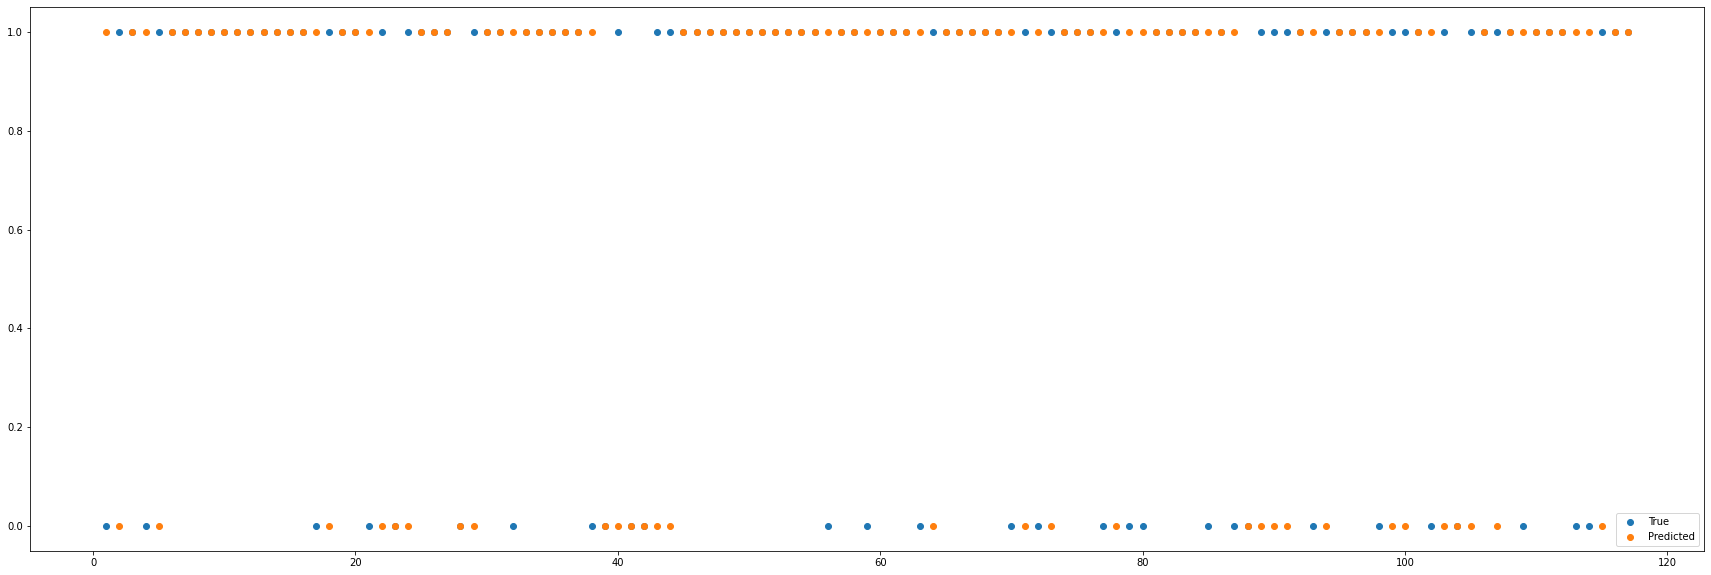

For time frame of 7 days the accuracy is 0.6086956521739131



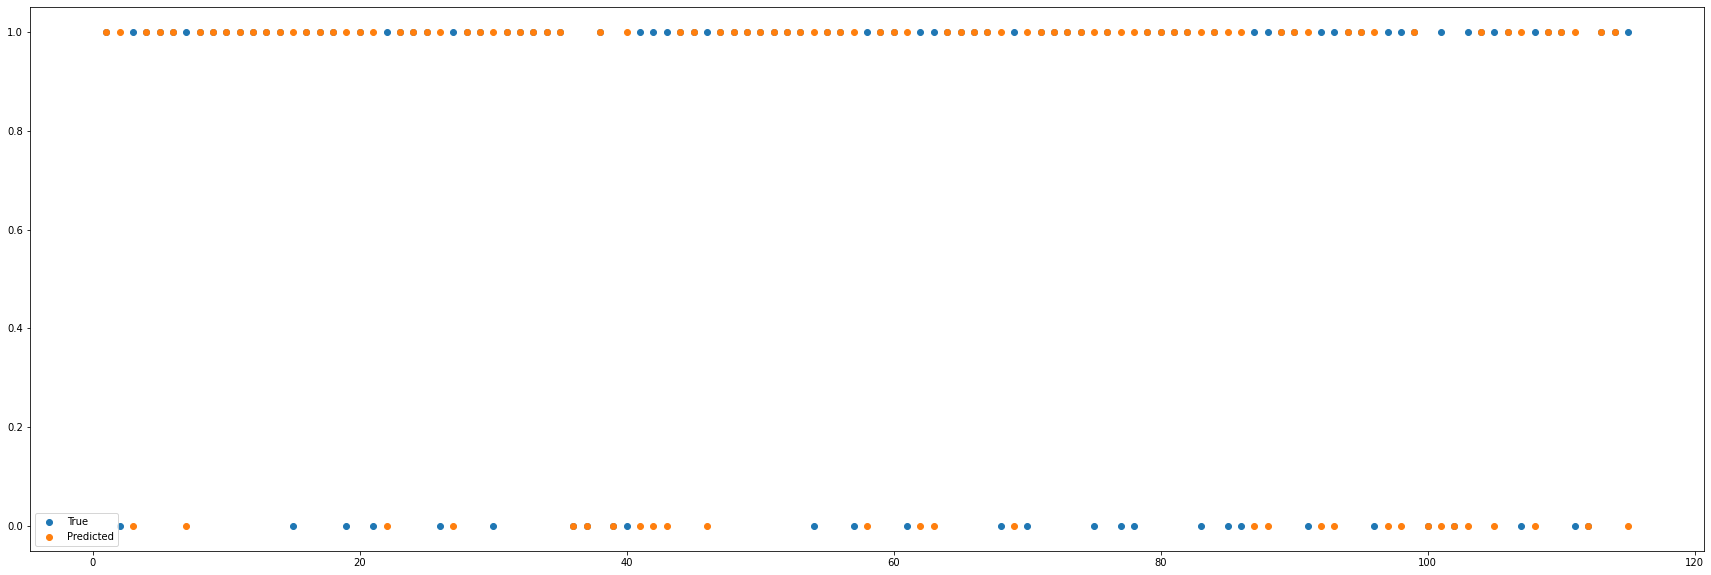

For time frame of 9 days the accuracy is 0.5752212389380531



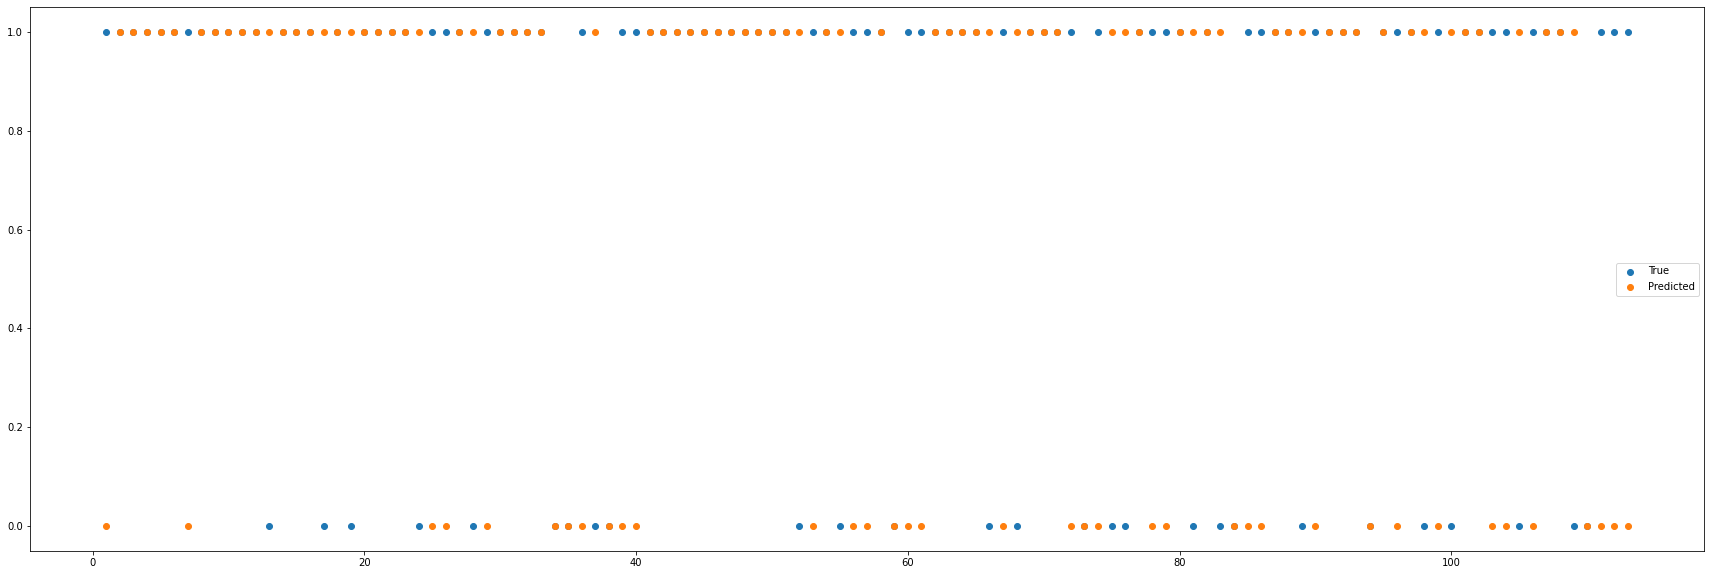

In [ ]:
for k in [3,5,7,9]:
  pred_bc = []
  true_bc = []
  i=0
  j=0
  model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_jobs=-1)
  while(j<121):
    model.fit(read.loc[i:i+k,X],read.loc[i:i+k,Y_class].values.ravel())
    y_pred = model.predict([read.loc[i+k+1,X]])
    y_true = read.loc[i+k+1,Y_class]
    pred_bc.append(y_pred[0].astype('int'))
    true_bc.append(y_true.astype('int'))
    j=i+k
    i+=1
  print("For time frame of "+str(k)+" days the accuracy is "+str(accuracy_score(true_bc,pred_bc))+"\n")
  plt.figure(figsize=(30,10))
  plt.scatter([i for i in range(1,i+1)],true_bc,marker='o')
  plt.scatter([i for i in range(1,i+1)],pred_bc,marker='o')
  plt.legend(['True','Predicted'])
  plt.show()

Adaboost Classifier

For time frame of 3 days the accuracy is 0.5798319327731093



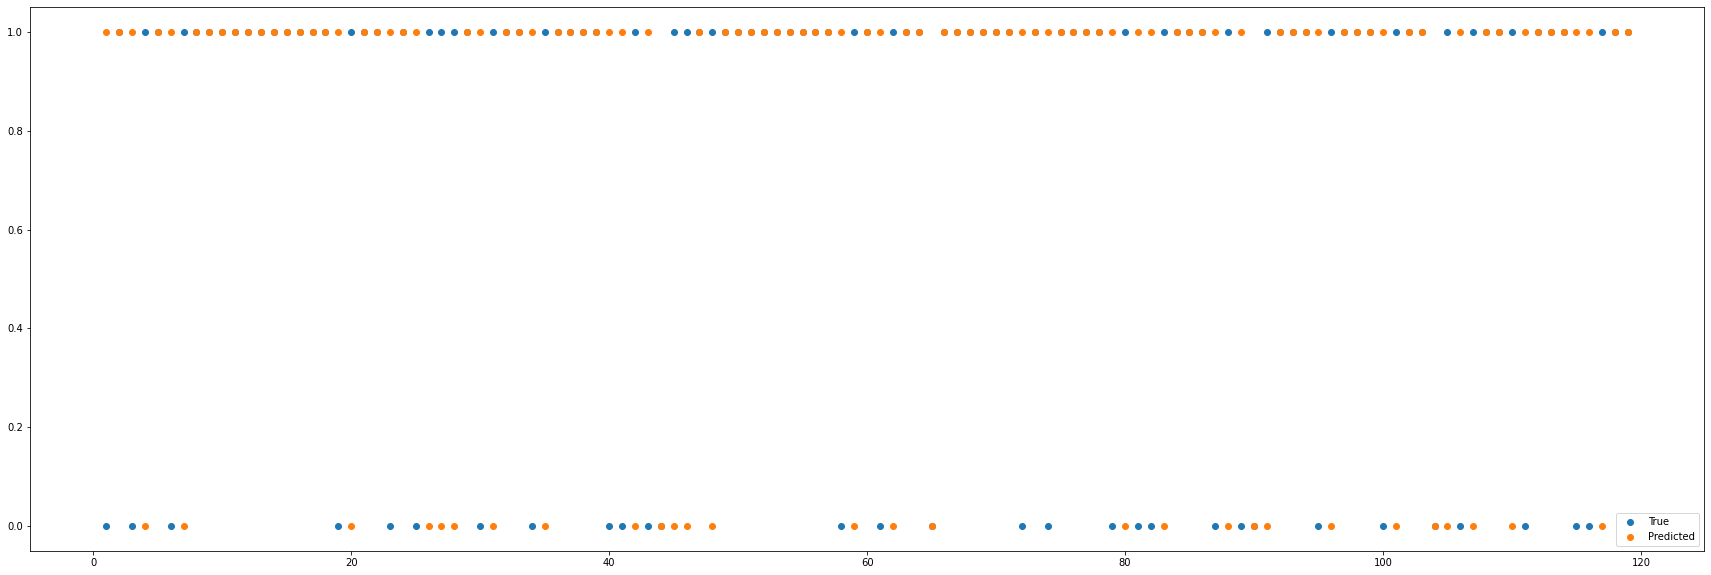

For time frame of 5 days the accuracy is 0.5897435897435898



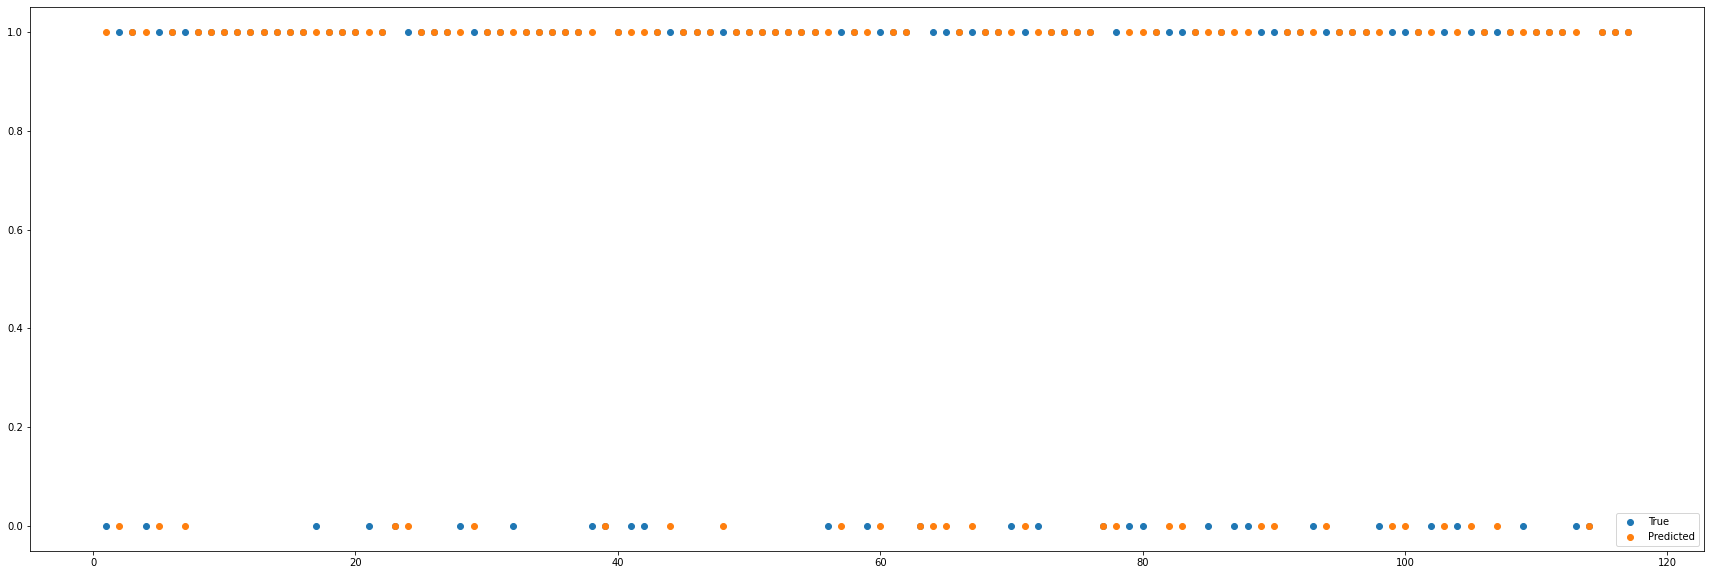

For time frame of 7 days the accuracy is 0.5565217391304348



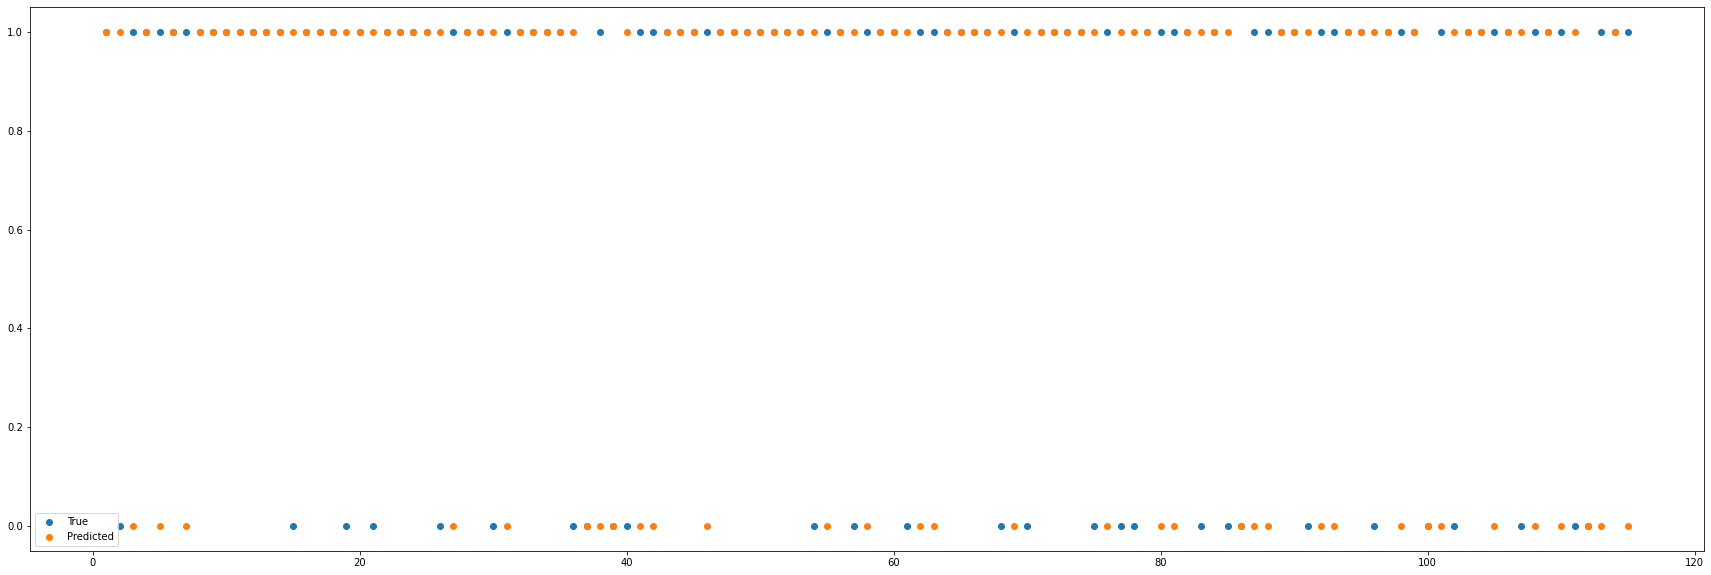

For time frame of 9 days the accuracy is 0.504424778761062



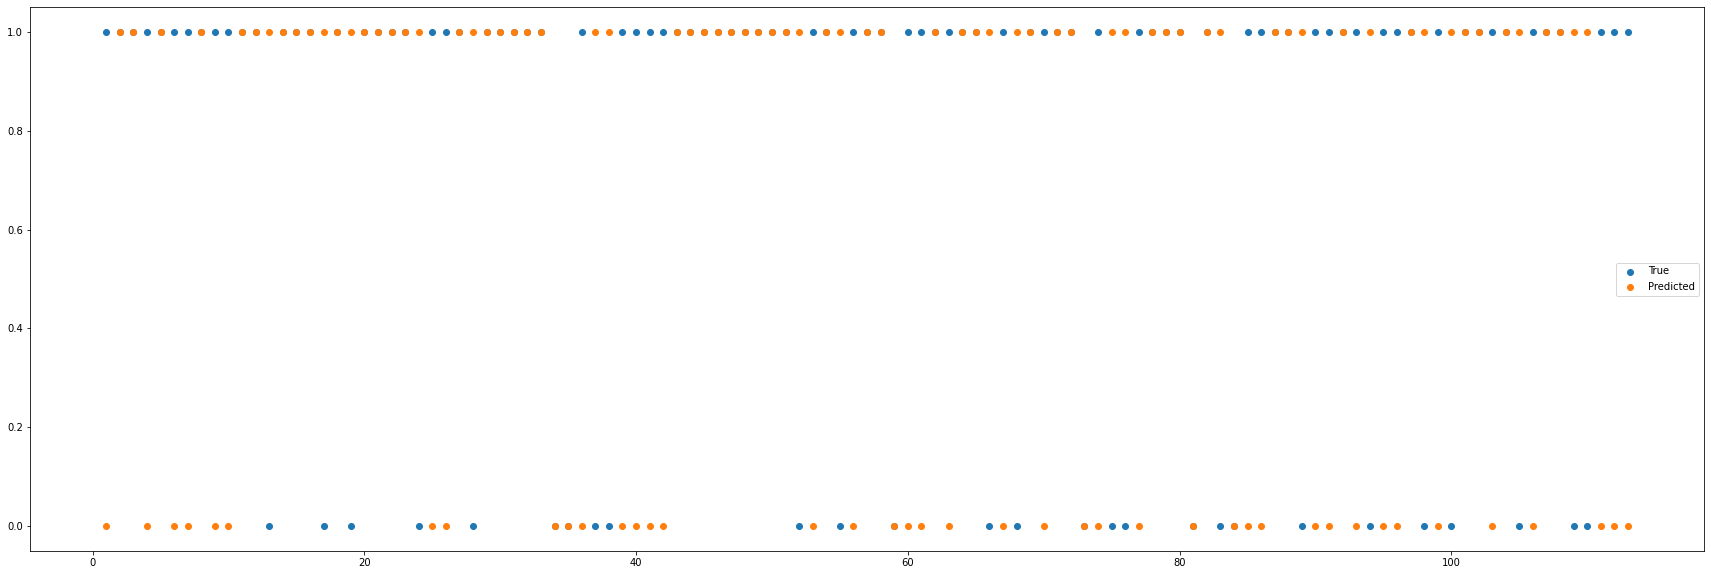

In [ ]:
 for k in [3,5,7,9]:
  pred_ac = []
  true_ac = []
  i=0
  j=0
  model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
  while(j<121):
    model.fit(read.loc[i:i+k,X],read.loc[i:i+k,Y_class].values.ravel())
    y_pred = model.predict([read.loc[i+k+1,X]])
    y_true = read.loc[i+k+1,Y_class]
    pred_ac.append(y_pred[0].astype('int'))
    true_ac.append(y_true.astype('int'))
    j=i+k
    i+=1
  print("For time frame of "+str(k)+" days the accuracy is "+str(accuracy_score(true_ac,pred_ac))+"\n")
  plt.figure(figsize=(30,10))
  plt.scatter([i for i in range(1,i+1)],true_ac,marker='o')
  plt.scatter([i for i in range(1,i+1)],pred_ac,marker='o')
  plt.legend(['True','Predicted'])
  plt.show()

KNN Classifier

For time frame of 3 days the accuracy is 0.47058823529411764



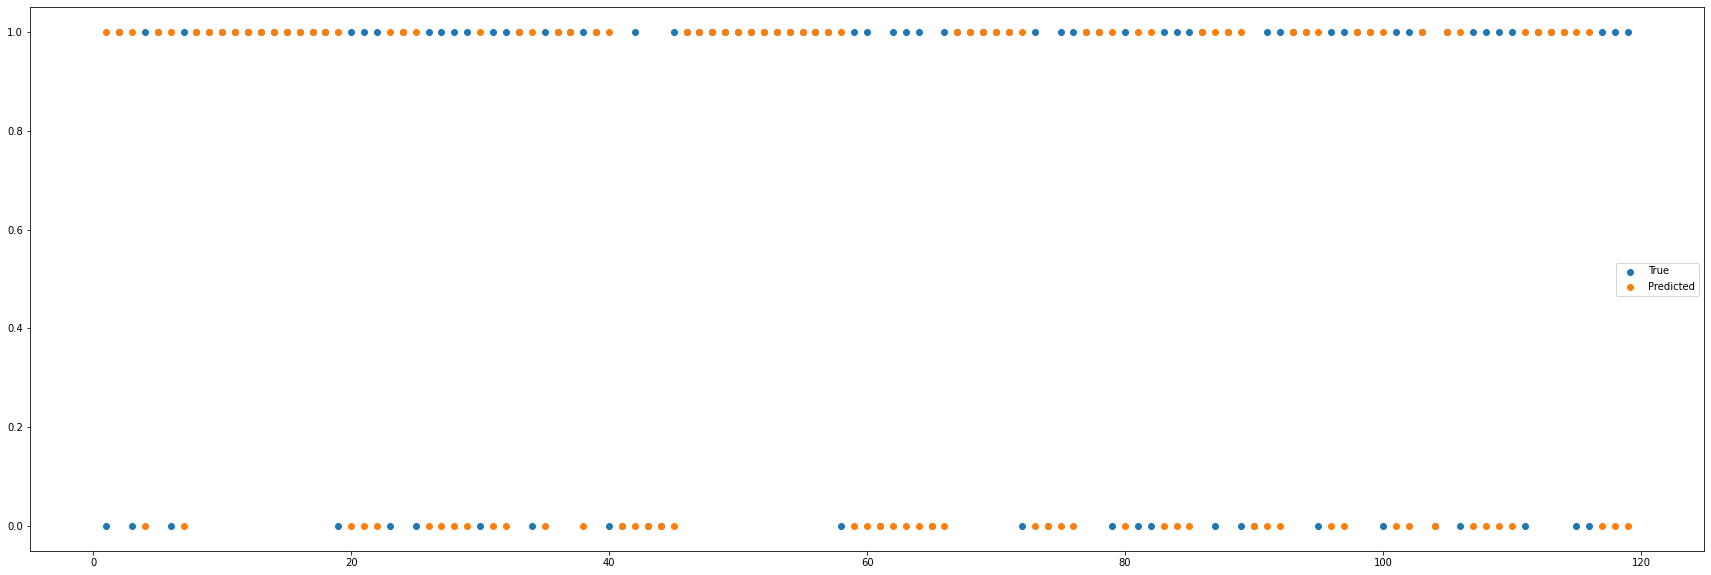

For time frame of 5 days the accuracy is 0.5641025641025641



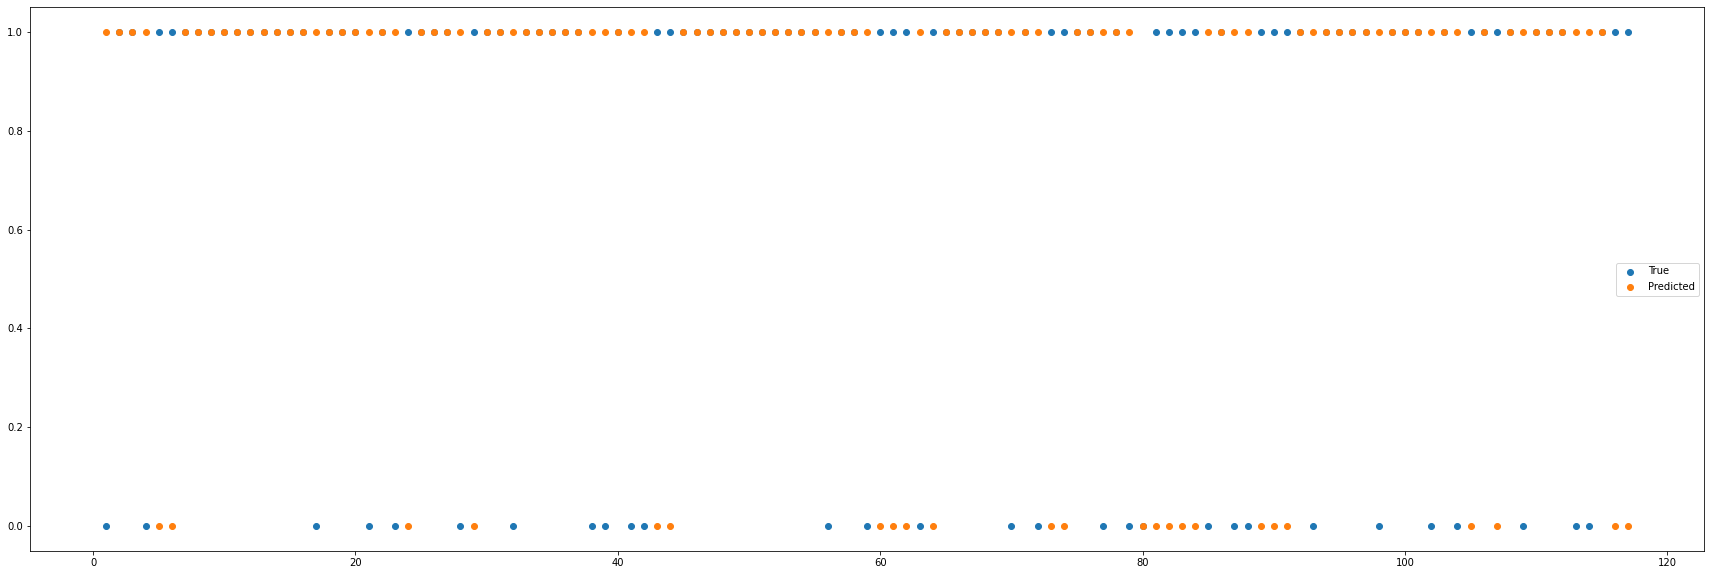

For time frame of 7 days the accuracy is 0.6521739130434783



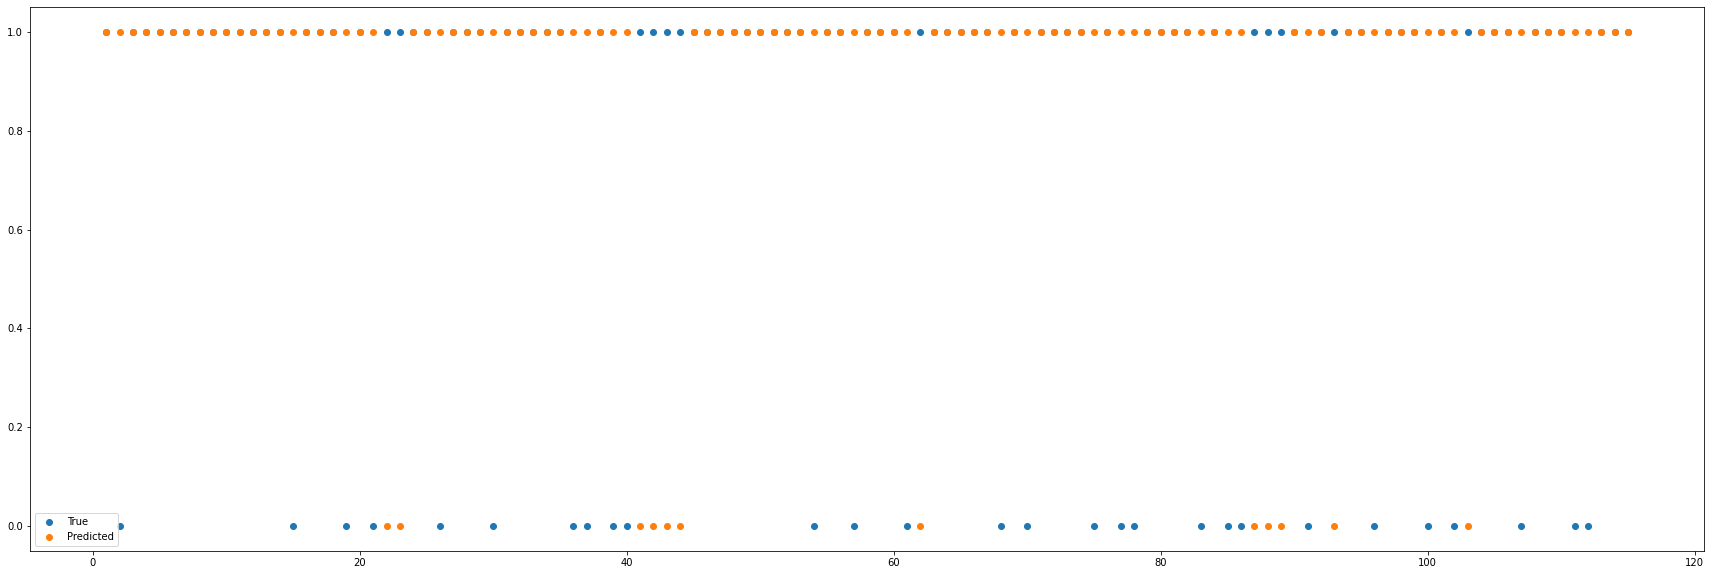

For time frame of 9 days the accuracy is 0.6991150442477876



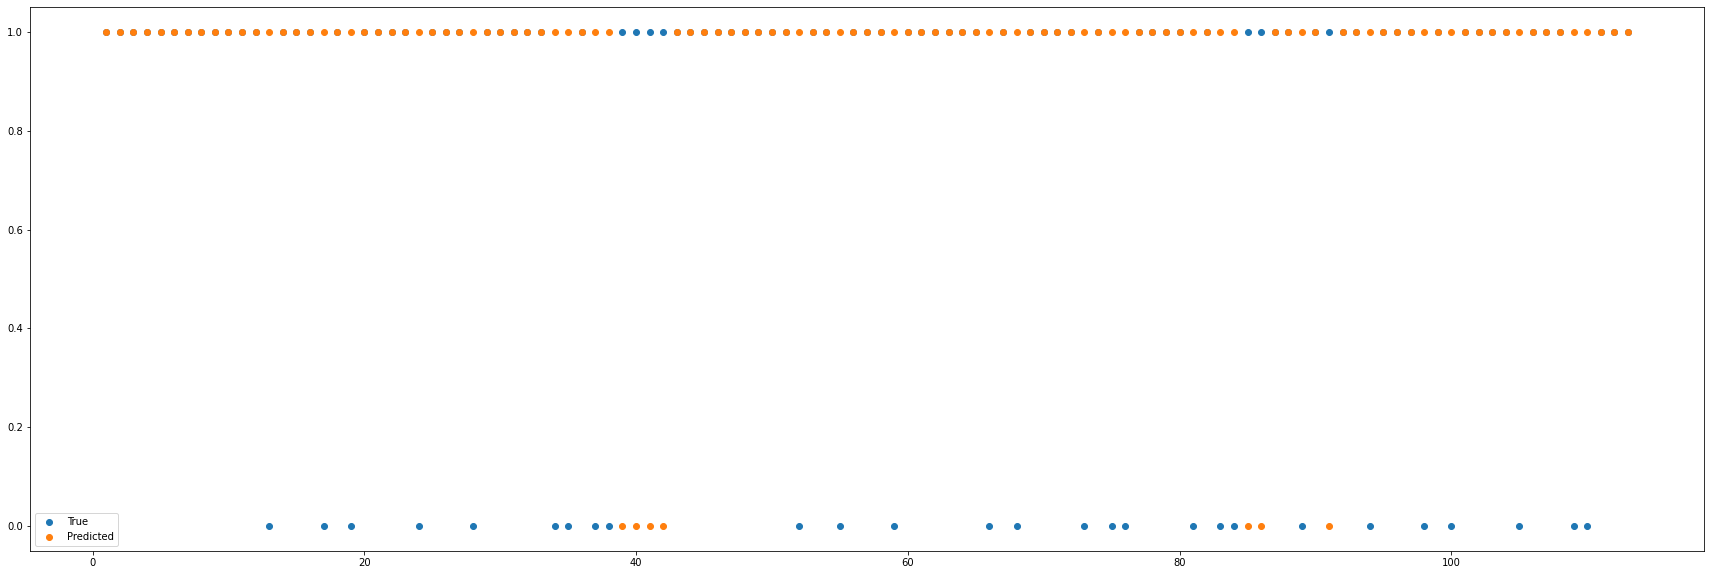

In [ ]:
for k in [3,5,7,9]:
  pred_knn = []
  true_knn = []
  i=0
  j=0
  model = KNeighborsClassifier(n_neighbors=k-1,n_jobs=-1)
  while(j<121):
    model.fit(read.loc[i:i+k,X],read.loc[i:i+k,Y_class].values.ravel())
    y_pred = model.predict([read.loc[i+k+1,X]])
    y_true = read.loc[i+k+1,Y_class]
    pred_knn.append(y_pred[0].astype('int'))
    true_knn.append(y_true.astype('int'))
    j=i+k
    i+=1
  print("For time frame of "+str(k)+" days the accuracy is "+str(accuracy_score(true_knn,pred_knn))+"\n")
  plt.figure(figsize=(30,10))
  plt.scatter([i for i in range(1,i+1)],true_knn,marker='o')
  plt.scatter([i for i in range(1,i+1)],pred_knn,marker='o')
  plt.legend(['True','Predicted'])
  plt.show()

1. RNNs + GRUs
2. LSTMs
3. Transformers + Boltzmann Machines (Later Stage)
4. Markov Models

Mihir Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

x = read[X].to_numpy()
y = read[Y].to_numpy()

trainx,testx,trainy,testy = train_test_split(x,y,test_size = 0.05)
model = keras.Sequential()
model.add(layers.SimpleRNN(128))
model.summary()
trx = trainx.reshape((trainx.shape[0],1,trainx.shape[1]))
tex = testx.reshape((testx.shape[0],1,testx.shape[1]))




Kwanit Model

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler as mms

x = read[X].to_numpy()
y = read[Y].to_numpy()

x = mms().fit_transform(x)
model_y = mms()
model_y.fit(y)
yt = model_y.transform(y)

trainx,testx,trainy,testy = train_test_split(x,yt,test_size = 0.05)
_,_,tyr,ty = train_test_split(x,y,test_size = 0.05)

def create_dataset(datax,datay, look_back=1):
	dataX, dataY = [], []
	for i in range(datax.shape[0]-look_back-1):
		a = datax[i:(i+look_back),:]
		dataX.append(a)
		dataY.append(datay[i + look_back])
	return np.array(dataX), np.array(dataY)

trax,tray = create_dataset(trainx,trainy,3)
tesx,tesy = create_dataset(testx,testy)
_,tyr = create_dataset(trainx,tyr,3)
_,ty = create_dataset(testx,ty)

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(3,trainx.shape[1])))
model.add(LSTM(10, activation='relu',return_sequences=True))
model.add(LSTM(2, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(trax,tray, epochs=1000, verbose=10)

yhat = model.predict(tesx, verbose=0)
yhat = model_y.inverse_transform(yhat)
print(mse(ty,yhat))

yhat1 = model.predict(trax, verbose=0)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

In [ ]:
yhat1 = model_y.inverse_transform(yhat1)
mse(tyr,yhat1)

7934.715442735226

In [ ]:
model_ = Sequential()
model_.add(LSTM(150, activation='relu', input_shape=(3,trainx.shape[1])))
model_.add(Dense(1))
model_.compile(optimizer='adam', loss='mse')
model_.fit(trax,tray, epochs=1000, verbose=10)

yhat2= model_.predict(tesx, verbose=0)
yhat2= model_y.inverse_transform(yhat2)
mse(ty,yhat2)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

16927.36718880324